## Car Price - Assignment
                                    - Muhilan P A

### Problem Statement:

An Auto company is doing the survey and trying to do the benchmarking of price of the New models / Variants. they would be launching in future based upon the various parameters of Vehicle.

1. Supervised predictive model need to be created which can predict the price( Column Z in Data Frame) of the Vehicle based upon the various attributes( 25) of the Vehicle.

2. Build the Multivariate Linear regression model, verifying the assumptions of the linear regression hold true.

3. Models should be evaluated based on the various metrics ( Rsquare , Adjusted R Square).

4. Model accuracy should be high but at the same time model should not be overfitted

5. Model should be built before and after removing the outliers to gauge the impact of outliers on the Behaviour of the Mathematical model.

6. Plots need to be constructed to check the assumptions of the Regression

7. Feature Selection needs to done, which will tell the impact of feature is increasing the price and which feature has the diminishing impact on the price.  Features with their respective importance score needs to be tabulated

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Car Price Dataset

In [2]:
Car_Price = pd.read_csv("Muhilan Pandian - car_price_Assignment.csv")

#Displaying all columns
pd.set_option('display.max_columns', None)

### Head

In [3]:
Car_Price.head()

symboling normalized_losses make fuel_type aspiration num_of_doors  \
0          3                 ?  gas       std        two  convertible   
1          3                 ?  gas       std        two  convertible   
2          1                 ?  gas       std        two    hatchback   
3          2               164  gas       std       four        sedan   
4          2               164  gas       std       four        sedan   

  body_style drive_wheels  engine_location   wheel_base  length  width  \
0        rwd        front             88.6  alfa-romero   168.8   64.1   
1        rwd        front             88.6  alfa-romero   168.8   64.1   
2        rwd        front             94.5  alfa-romero   171.2   65.5   
3        fwd        front             99.8         audi   176.6   66.2   
4        4wd        front             99.4         audi   176.6   66.4   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

### Tail

In [4]:
Car_Price.tail()

symboling normalized_losses    make fuel_type aspiration num_of_doors  \
200         -1                95     gas       std       four        sedan   
201         -1                95     gas     turbo       four        sedan   
202         -1                95     gas       std       four        sedan   
203         -1                95  diesel     turbo       four        sedan   
204         -1                95     gas     turbo       four        sedan   

    body_style drive_wheels  engine_location wheel_base  length  width  \
200        rwd        front            109.1      volvo   188.8   68.9   
201        rwd        front            109.1      volvo   188.8   68.8   
202        rwd        front            109.1      volvo   188.8   68.9   
203        rwd        front            109.1      volvo   188.8   68.9   
204        rwd        front            109.1      volvo   188.8   68.9   

     height  curb_weight engine_type num_of_cylinders  engine_size  \
200    55.5         2952         ohc             four          141   
201    55.5         3049         ohc             four          141   
202    55.5         3012        ohcv              six          173   
203    55.5         3217         ohc              six          145   
204    55.5         3062         ohc             four          141   

    fuel_system  bore stroke  compression_ratio horsepower peak_rpm  city_mpg  \
200        mpfi  3.78   3.15                9.5        114     5400        23   
201        mpfi  3.78   3.15                8.7        160     5300        19   
202        mpfi  3.58   2.87                8.8        134     5500        18   
203         idi  3.01    3.4               23.0        106     4800        26   
204        mpfi  3.78   3.15                9.5        114     5400        19   

     highway_mpg  price  
200           28  16845  
201           25  19045  
202           23  21485  
203           27  22470  
204           25  22625

### Shape

In [5]:
Car_Price.shape

(205, 26)

### Columns

In [6]:
Car_Price.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

### Details about Dataset

In [7]:
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    float64
 9   wheel_base         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

### Converting '?' into Nan

In [8]:
Car_Price = Car_Price.replace({"?": np.NaN})

### Renaming Columns

In [9]:
Car_Price.rename( columns = { 'make' : "Fuel_Type"} , inplace  = True)

In [10]:
Car_Price.rename( columns = { 'fuel_type' : "Aspiration" } , inplace = True)

In [11]:
Car_Price.rename( columns = { 'aspiration' : "Number_of_Doors" } , inplace = True)

In [12]:
Car_Price.rename( columns = { 'num_of_doors' : "Body_Style" } , inplace = True)

In [13]:
Car_Price.rename( columns = { 'body_style' : "Drive_Wheels" } , inplace = True)

In [14]:
Car_Price.rename( columns = { 'drive_wheels' : "Engine_Location" } , inplace = True)

In [15]:
Car_Price.rename( columns = { 'engine_location' : "Wheel_Base" } , inplace = True)

In [16]:
Car_Price.rename( columns = { 'wheel_base' : "Make" } , inplace = True)

### Rearranging Columns

In [17]:
column_titles = ['Make','symboling', 'normalized_losses', 'Fuel_Type', 'Aspiration',
       'Number_of_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'length', 'width', 'height', 'curb_weight',
       'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore',
       'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']

Car_Price = Car_Price.reindex(columns=column_titles)
Car_Price.head(2)

Make  symboling normalized_losses Fuel_Type Aspiration  \
0  alfa-romero          3               NaN       gas        std   
1  alfa-romero          3               NaN       gas        std   

  Number_of_Doors   Body_Style Drive_Wheels Engine_Location  Wheel_Base  \
0             two  convertible          rwd           front        88.6   
1             two  convertible          rwd           front        88.6   

   length  width  height  curb_weight engine_type num_of_cylinders  \
0   168.8   64.1    48.8         2548        dohc             four   
1   168.8   64.1    48.8         2548        dohc             four   

   engine_size fuel_system  bore stroke  compression_ratio horsepower  \
0          130        mpfi  3.47   2.68                9.0        111   
1          130        mpfi  3.47   2.68                9.0        111   

  peak_rpm  city_mpg  highway_mpg  price  
0     5000        21           27  13495  
1     5000        21           27  16500

### Converting Data types

In [18]:
Car_Price['normalized_losses'] = Car_Price['normalized_losses'].astype('float')

In [19]:
Car_Price['bore'] = Car_Price['bore'].astype('float')

In [20]:
Car_Price['stroke'] = Car_Price['stroke'].astype('float')

In [21]:
Car_Price['horsepower'] = Car_Price['horsepower'].astype('float')

In [22]:
Car_Price['peak_rpm'] = Car_Price['peak_rpm'].astype('float')

In [23]:
Car_Price['price'] = Car_Price['price'].astype('float')

### Describe (Summary)

In [24]:
Car_Price.describe()

symboling  normalized_losses  Wheel_Base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression_ratio  horsepower     peak_rpm    city_mpg  highway_mpg  \
count         205.000000  203.000000   203.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.714369   479.334560    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

### Describe (Summary, Including all the factors)

In [25]:
Car_Price.describe(include="all")

Make   symboling  normalized_losses Fuel_Type Aspiration  \
count      205  205.000000         164.000000       205        205   
unique      22         NaN                NaN         2          2   
top     toyota         NaN                NaN       gas        std   
freq        32         NaN                NaN       185        168   
mean       NaN    0.834146         122.000000       NaN        NaN   
std        NaN    1.245307          35.442168       NaN        NaN   
min        NaN   -2.000000          65.000000       NaN        NaN   
25%        NaN    0.000000          94.000000       NaN        NaN   
50%        NaN    1.000000         115.000000       NaN        NaN   
75%        NaN    2.000000         150.000000       NaN        NaN   
max        NaN    3.000000         256.000000       NaN        NaN   

       Number_of_Doors Body_Style Drive_Wheels Engine_Location  Wheel_Base  \
count              203        205          205             205  205.000000   
unique               2          5            3               2         NaN   
top               four      sedan          fwd           front         NaN   
freq               114         96          120             202         NaN   
mean               NaN        NaN          NaN             NaN   98.756585   
std                NaN        NaN          NaN             NaN    6.021776   
min                NaN        NaN          NaN             NaN   86.600000   
25%                NaN        NaN          NaN             NaN   94.500000   
50%                NaN        NaN          NaN             NaN   97.000000   
75%                NaN        NaN          NaN             NaN  102.400000   
max                NaN        NaN          NaN             NaN  120.900000   

            length       width      height  curb_weight engine_type  \
count   205.000000  205.000000  205.000000   205.000000         205   
unique         NaN         NaN         NaN          NaN           7   
top            NaN         NaN         NaN          NaN         ohc   
freq           NaN         NaN         NaN          NaN         148   
mean    174.049268   65.907805   53.724878  2555.565854         NaN   
std      12.337289    2.145204    2.443522   520.680204         NaN   
min     141.100000   60.300000   47.800000  1488.000000         NaN   
25%     166.300000   64.100000   52.000000  2145.000000         NaN   
50%     173.200000   65.500000   54.100000  2414.000000         NaN   
75%     183.100000   66.900000   55.500000  2935.000000         NaN   
max     208.100000   72.300000   59.800000  4066.000000         NaN   

       num_of_cylinders  engine_size fuel_system        bore      stroke  \
count               205   205.000000         205  201.000000  201.000000   
unique                7          NaN           8         NaN         NaN   
top                four          NaN        mpfi         NaN         NaN   
freq                159          NaN          94         NaN         NaN   
mean                NaN   126.907317         NaN    3.329751    3.255423   
std                 NaN    41.642693         NaN    0.273539    0.316717   
min                 NaN    61.000000         NaN    2.540000    2.070000   
25%                 NaN    97.000000         NaN    3.150000    3.110000   
50%                 NaN   120.000000         NaN    3.310000    3.290000   
75%                 NaN   141.000000         NaN    3.590000    3.410000   
max                 NaN   326.000000         NaN    3.940000    4.170000   

        compression_ratio  horsepower     peak_rpm    city_mpg  highway_mpg  \
count          205.000000  203.000000   203.000000  205.000000   205.000000   
unique                NaN         NaN          NaN         NaN          NaN   
top                   NaN         NaN          NaN         NaN          NaN   
freq                  NaN         NaN          NaN         NaN          NaN   
mean            10.142537  104.256158  5125.369458   25.219512    30.75

### Value Counts

In [26]:
Car_Price.Make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: Make, dtype: int64

In [27]:
Car_Price.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [28]:
Car_Price.Fuel_Type.value_counts()

gas       185
diesel     20
Name: Fuel_Type, dtype: int64

In [29]:
Car_Price.Aspiration.value_counts()

std      168
turbo     37
Name: Aspiration, dtype: int64

In [30]:
Car_Price.Number_of_Doors.value_counts()

four    114
two      89
Name: Number_of_Doors, dtype: int64

In [31]:
Car_Price.Body_Style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: Body_Style, dtype: int64

In [32]:
Car_Price.Drive_Wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: Drive_Wheels, dtype: int64

In [33]:
Car_Price.Engine_Location.value_counts()

front    202
rear       3
Name: Engine_Location, dtype: int64

In [34]:
Car_Price.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [35]:
Car_Price.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [36]:
Car_Price.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

### Checking null values or missing values

In [37]:
Car_Price.isnull().sum()

Make                  0
symboling             0
normalized_losses    41
Fuel_Type             0
Aspiration            0
Number_of_Doors       2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

### Replacing null values with Logical Values

In [38]:
Car_Price.normalized_losses.fillna(Car_Price.normalized_losses.mean(), inplace = True)
#Filling with mean

In [39]:
Car_Price.Number_of_Doors.fillna('four', inplace = True)

In [40]:
Car_Price.bore.fillna(3.32, inplace = True)
#Filling with mean(3.32)

In [41]:
Car_Price.stroke.fillna(3.25, inplace = True)
#Filling with mean(3.25)

In [42]:
Car_Price.horsepower.fillna(95, inplace = True)
#Filling wiht median(95)

In [43]:
Car_Price.peak_rpm.fillna(5200, inplace = True)
#Filling wiht median(5200)

In [44]:
Car_Price.price.fillna(10295, inplace = True)
#Filling wiht median(10295)

### Checking null values after replacing

In [45]:
Car_Price.isnull().sum()

Make                 0
symboling            0
normalized_losses    0
Fuel_Type            0
Aspiration           0
Number_of_Doors      0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Exploratory Data Analysis

### Histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021645921E08>,
      dtype=object)

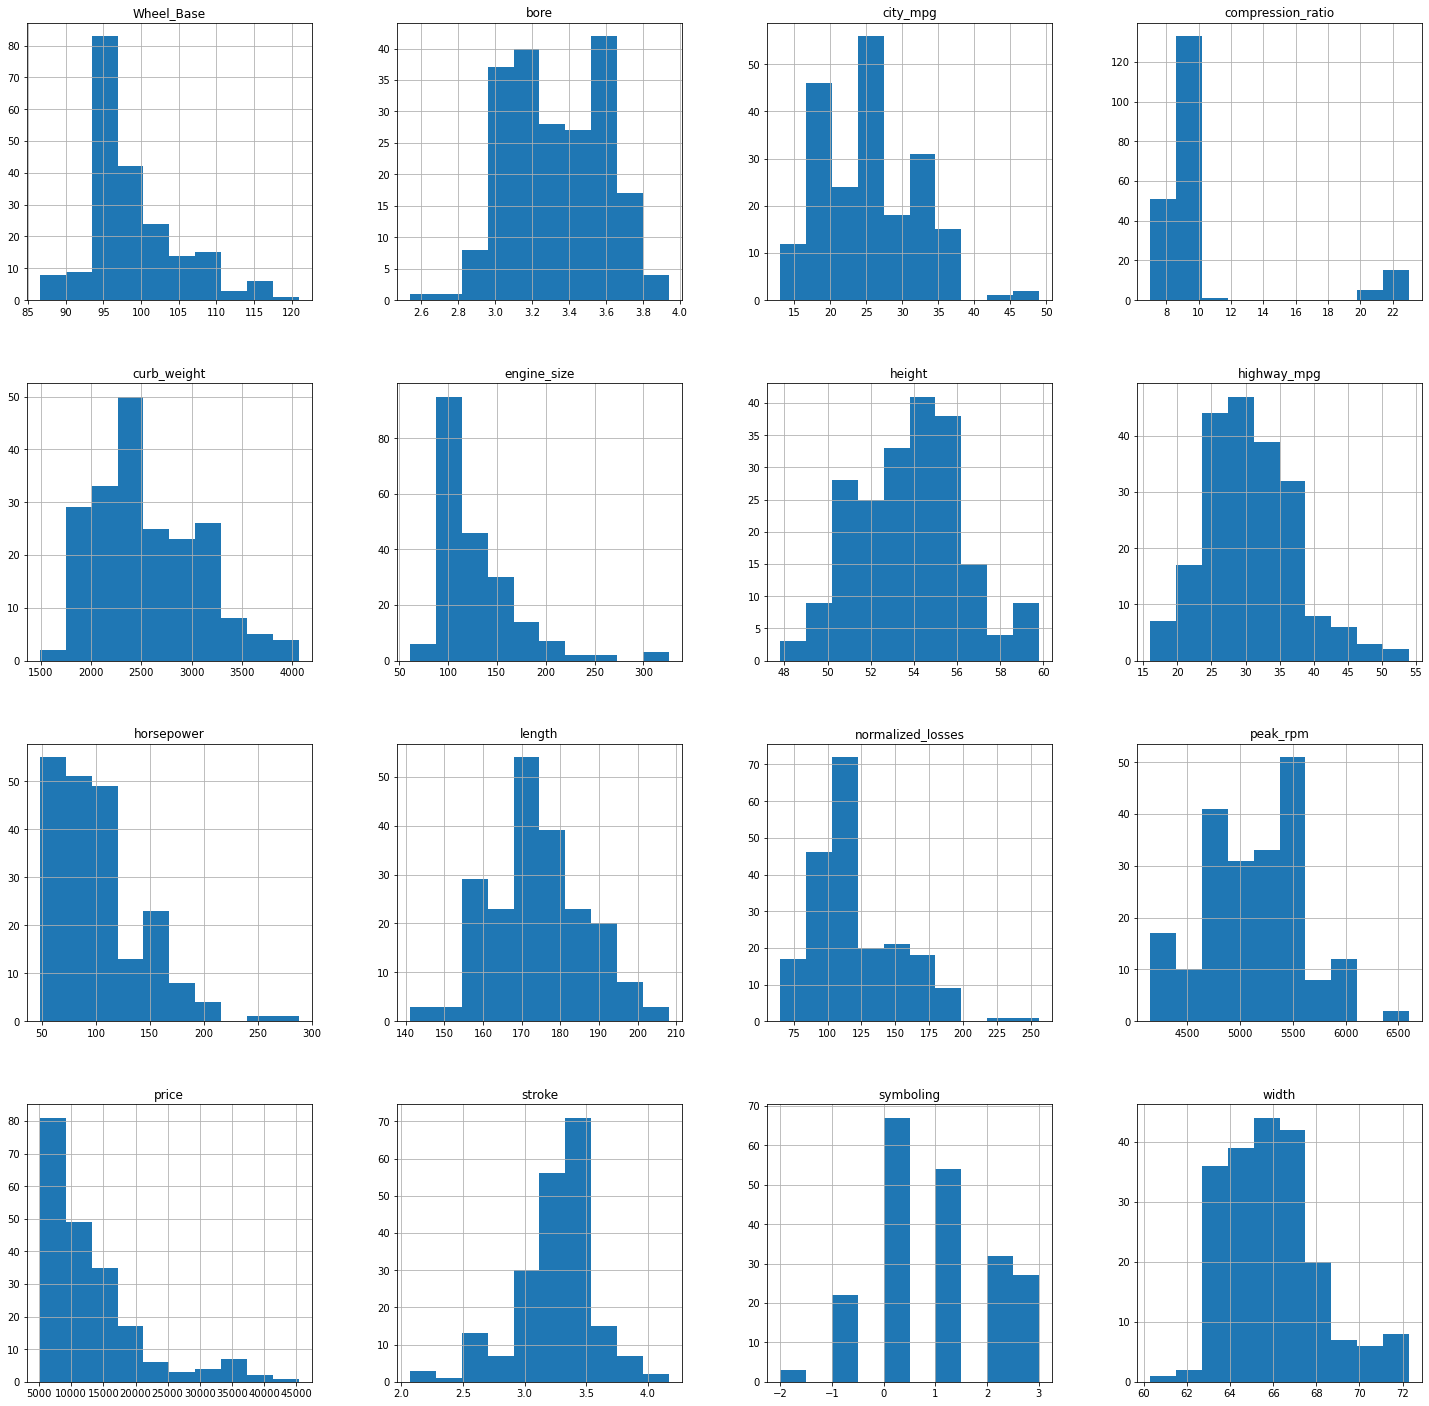

In [46]:
Car_Price.hist(figsize=(25,25))
# x-axis = Features/Columns and Y-axis = No. of records

### Box Plot:

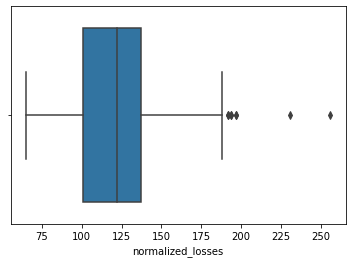

In [47]:
sns.boxplot(Car_Price['normalized_losses'])

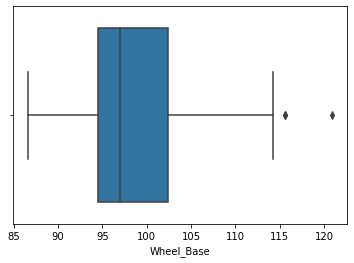

In [48]:
sns.boxplot(Car_Price['Wheel_Base'])

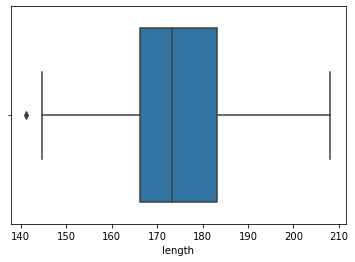

In [49]:
sns.boxplot(Car_Price['length'])

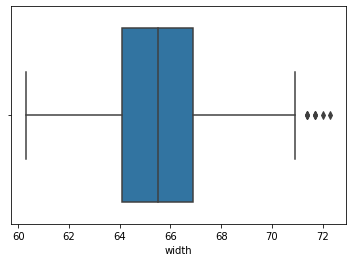

In [50]:
sns.boxplot(Car_Price['width'])

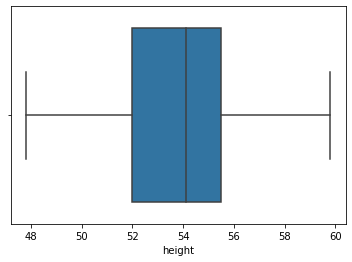

In [51]:
sns.boxplot(Car_Price['height'])

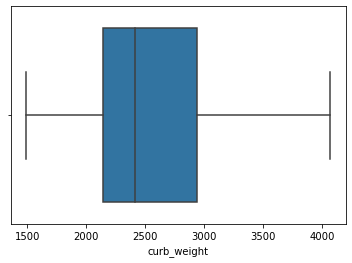

In [52]:
sns.boxplot(Car_Price['curb_weight'])

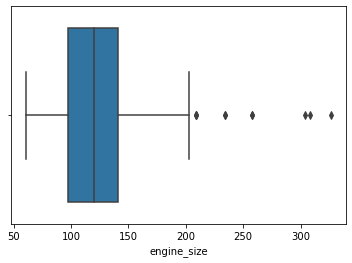

In [53]:
sns.boxplot(Car_Price['engine_size'])

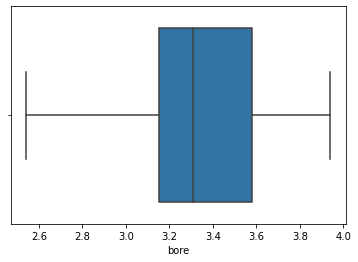

In [54]:
sns.boxplot(Car_Price['bore'])

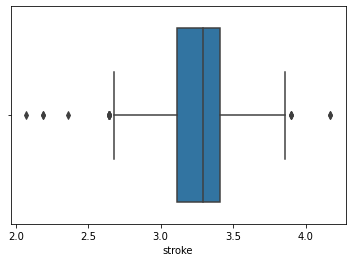

In [55]:
sns.boxplot(Car_Price['stroke'])

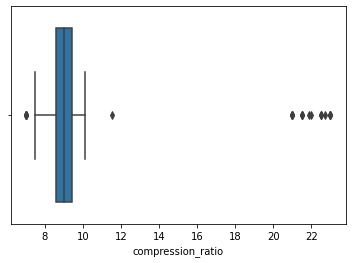

In [56]:
sns.boxplot(Car_Price['compression_ratio'])

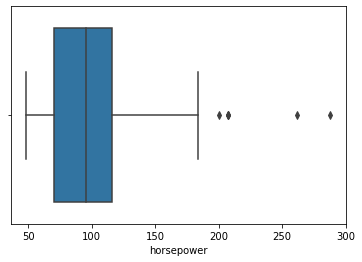

In [57]:
sns.boxplot(Car_Price['horsepower'])

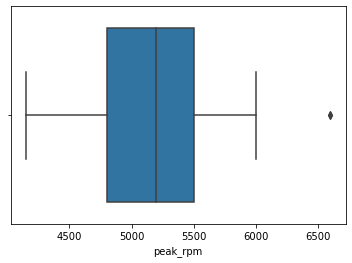

In [58]:
sns.boxplot(Car_Price['peak_rpm'])

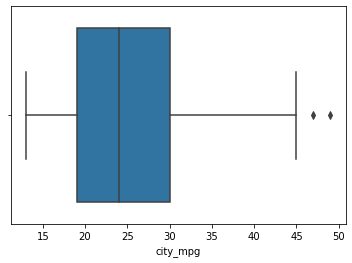

In [59]:
sns.boxplot(Car_Price['city_mpg'])

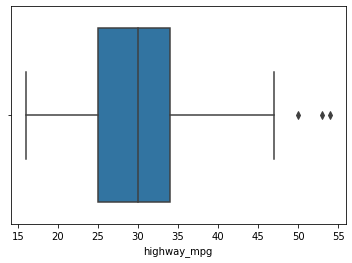

In [60]:
sns.boxplot(Car_Price['highway_mpg'])

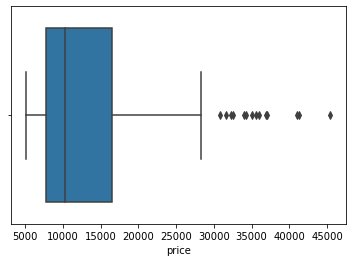

In [61]:
sns.boxplot(Car_Price['price'])

#### Summary of Box Plot:
There are few outliers in some of the features such as Normalized Losses, Engine Size, Stroke, Horse Power and huge outliers in columns such as Compression Ratio & Price.


### Heat Map:

###### From the below heat map, we might experience the problem of multicollinearity between several independent features/variables as there exists a high positive and negative correlation among them.

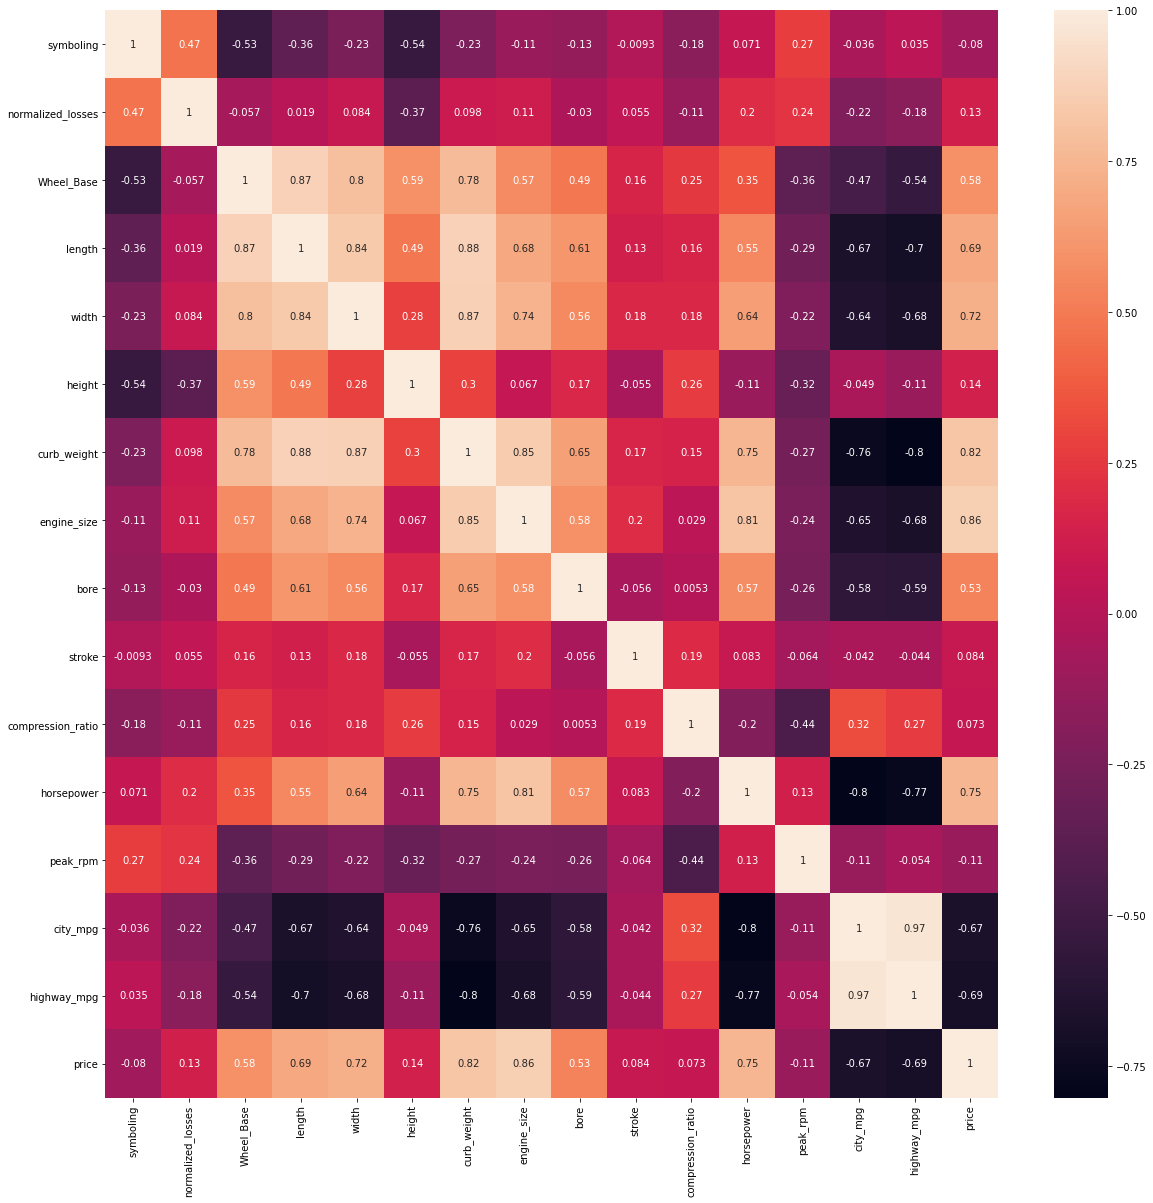

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(Car_Price.corr(),annot=True)

### Pair Plot

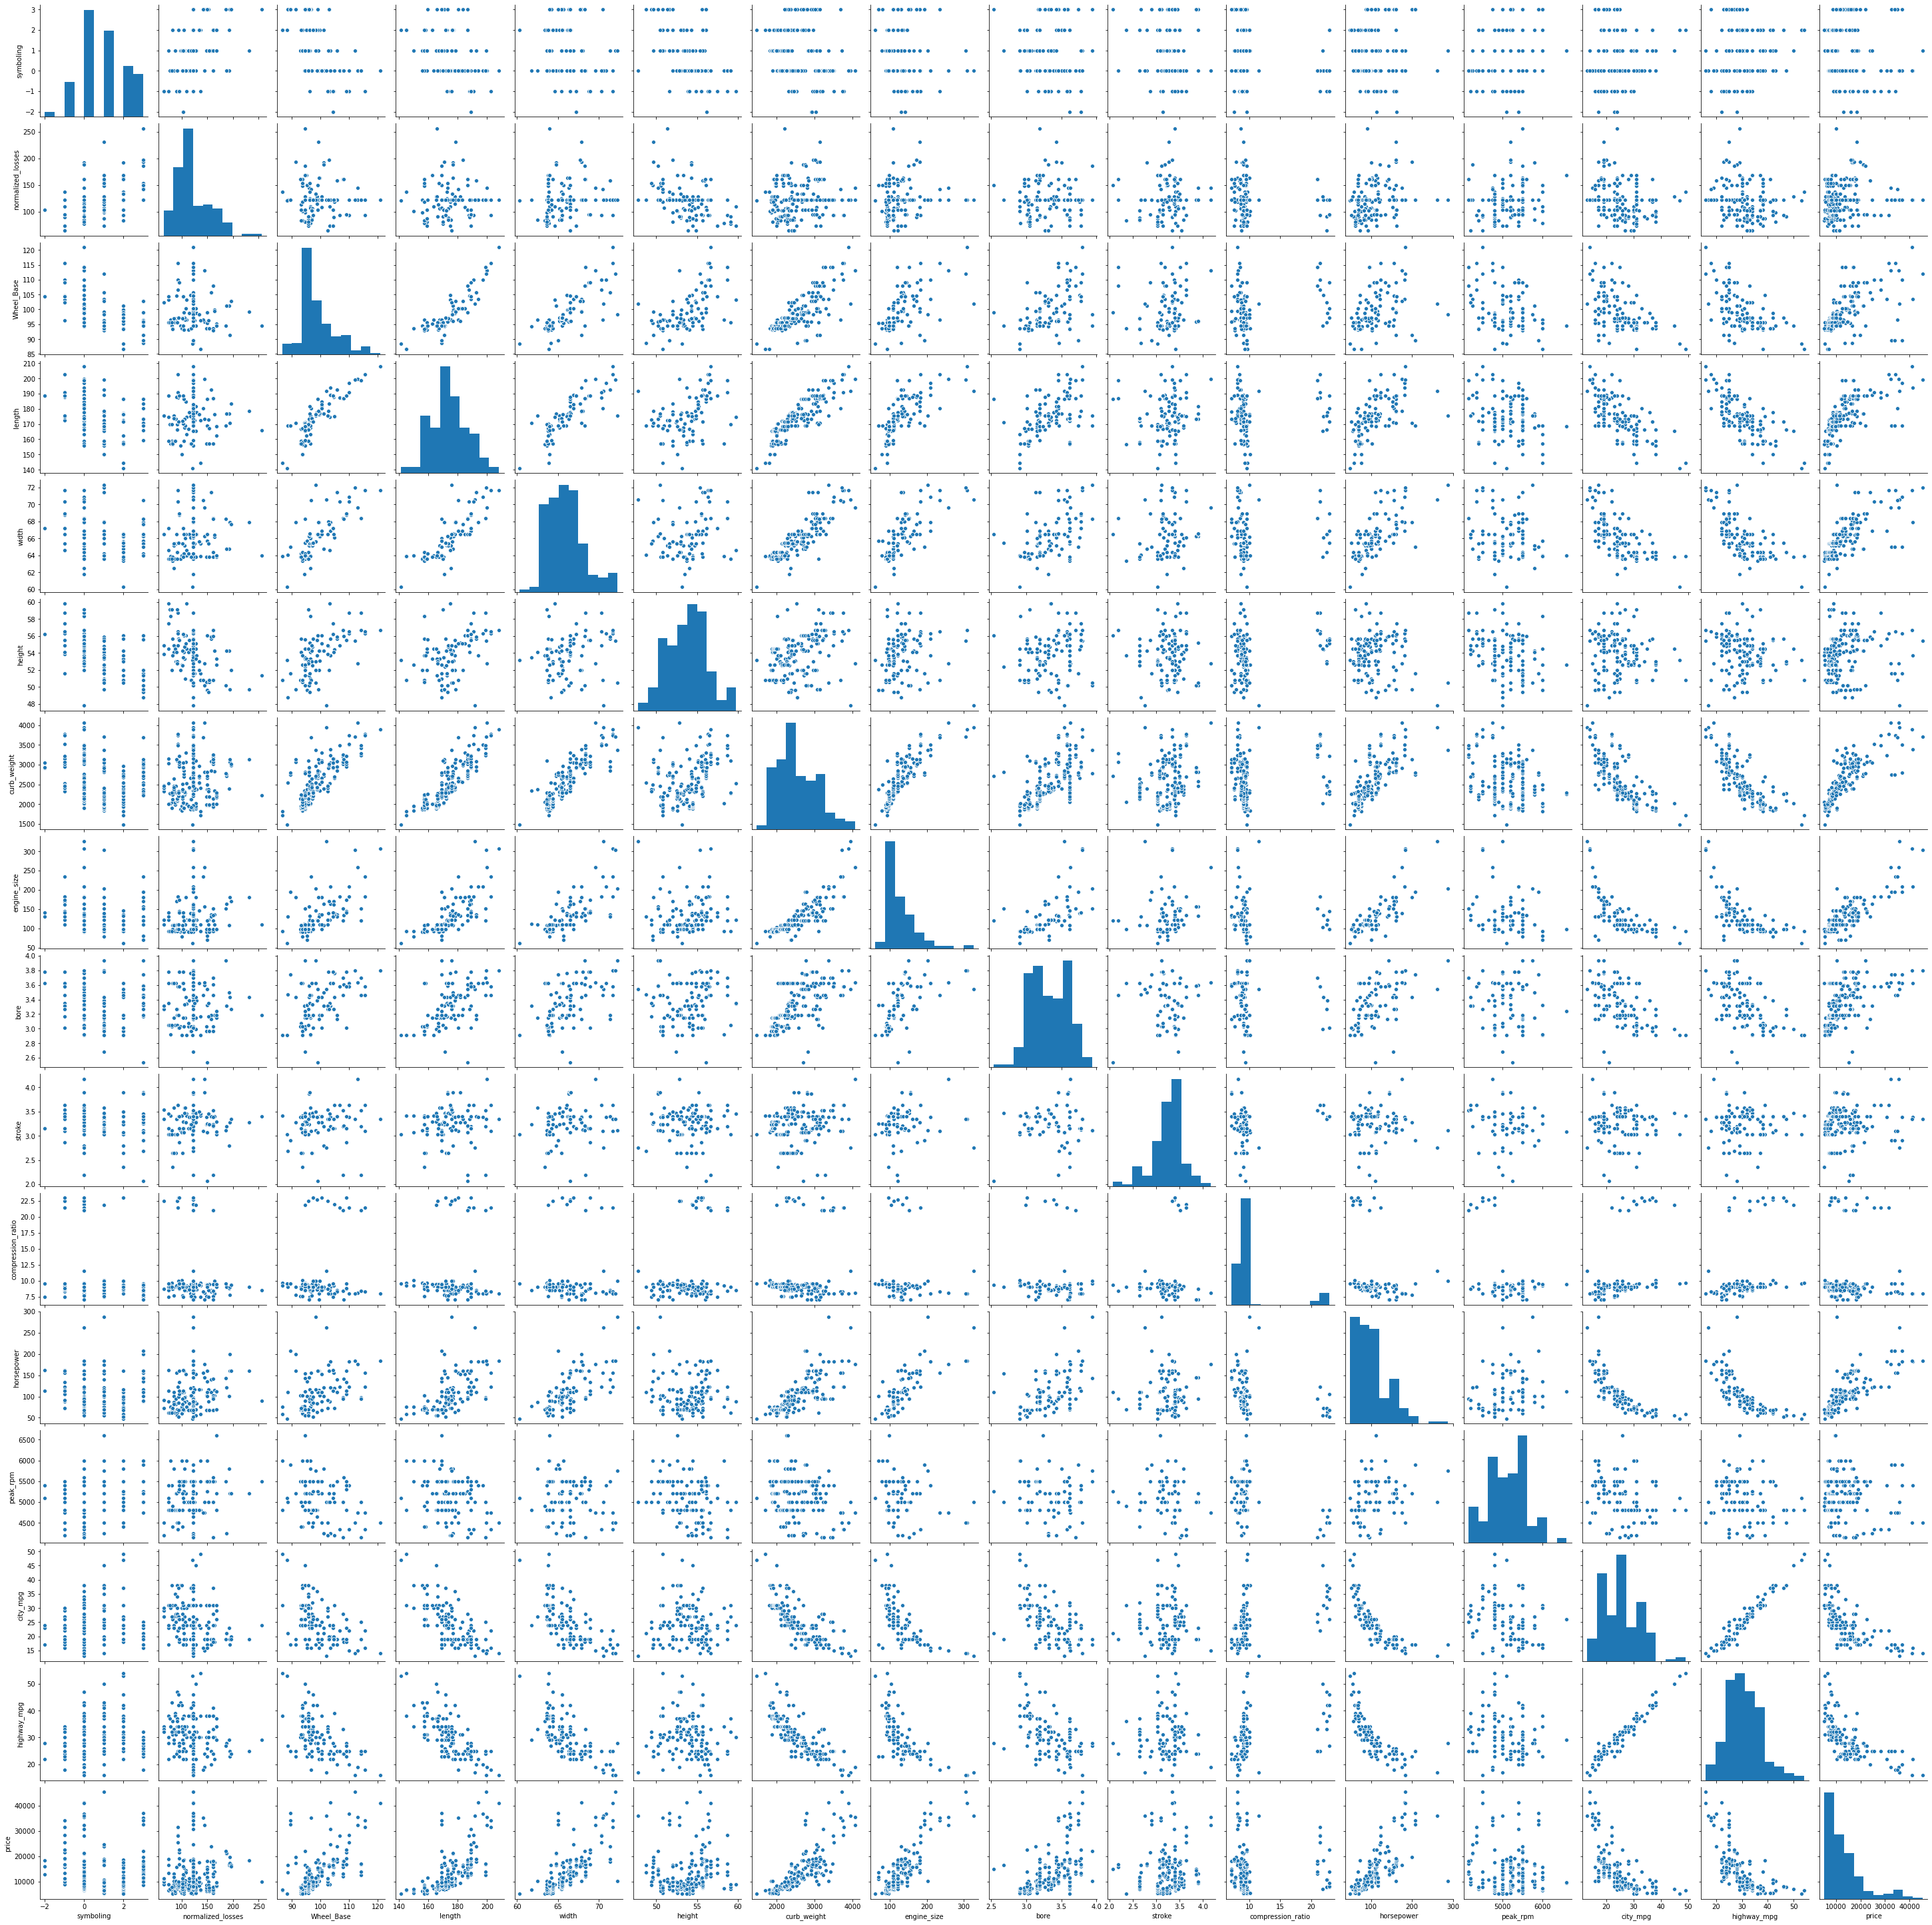

In [63]:
sns.pairplot(Car_Price)

### Correlation:

In [64]:
Car_Price.corr()

symboling  normalized_losses  Wheel_Base    length  \
symboling           1.000000           0.465190   -0.531954 -0.357612   
normalized_losses   0.465190           1.000000   -0.056518  0.019209   
Wheel_Base         -0.531954          -0.056518    1.000000  0.874587   
length             -0.357612           0.019209    0.874587  1.000000   
width              -0.232919           0.084195    0.795144  0.841118   
height             -0.541038          -0.370706    0.589435  0.491029   
curb_weight        -0.227691           0.097785    0.776386  0.877728   
engine_size        -0.105790           0.110997    0.569329  0.683360   
bore               -0.131309          -0.029889    0.489159  0.606743   
stroke             -0.009279           0.054629    0.161138  0.129660   
compression_ratio  -0.178515          -0.114525    0.249786  0.158414   
horsepower          0.071064           0.203380    0.352876  0.553337   
peak_rpm            0.273851           0.237719   -0.361338 -0.286362   
city_mpg           -0.035823          -0.218749   -0.470414 -0.670909   
highway_mpg         0.034606          -0.178221   -0.544082 -0.704662   
price              -0.080149           0.133823    0.584847  0.686567   

                      width    height  curb_weight  engine_size      bore  \
symboling         -0.232919 -0.541038    -0.227691    -0.105790 -0.131309   
normalized_losses  0.084195 -0.370706     0.097785     0.110997 -0.029889   
Wheel_Base         0.795144  0.589435     0.776386     0.569329  0.489159   
length             0.841118  0.491029     0.877728     0.683360  0.606743   
width              1.000000  0.279210     0.867032     0.735433  0.559213   
height             0.279210  1.000000     0.295572     0.067149  0.172291   
curb_weight        0.867032  0.295572     1.000000     0.850594  0.648672   
engine_size        0.735433  0.067149     0.850594     1.000000  0.584713   
bore               0.559213  0.172291     0.648672     0.584713  1.000000   
stroke             0.182971 -0.054779     0.168876     0.203536 -0.055896   
compression_ratio  0.181129  0.261214     0.151362     0.028971  0.005333   
horsepower         0.641337 -0.109286     0.750927     0.810216  0.574378   
peak_rpm          -0.219374 -0.321113    -0.266358    -0.244383 -0.255284   
city_mpg          -0.642704 -0.048640    -0.757414    -0.653658 -0.583587   
highway_mpg       -0.677218 -0.107358    -0.797465    -0.677470 -0.586190   
price              0.724558  0.140439     0.819817     0.860343  0.532870   

                     stroke  compression_ratio  horsepower  peak_rpm  \
symboling         -0.009279          -0.178515    0.071064  0.273851   
normalized_losses  0.054629          -0.114525    0.203380  0.237719   
Wheel_Base         0.161138           0.249786    0.352876 -0.361338   
length             0.129660           0.158414    0.553337 -0.286362   
width              0.182971           0.181129    0.641337 -0.219374   
height            -0.054779           0.261214   -0.109286 -0.321113   
curb_weight        0.168876           0.151362    0.750927 -0.266358   
engine_size        0.203536           0.028971    0.810216 -0.244383   
bore              -0.055896           0.005333    0.574378 -0.255284   
stroke             1.000000           0.186168    0.083476 -0.064305   
compression_ratio  0.186168           1.000000   -0.204851 -0.436441   
horsepower         0.083476          -0.204851    1.000000  0.130565   
peak_rpm          -0.064305          -0.436441    0.130565  1.000000   
city_mpg          -0.041740           0.324701   -0.802170 -0.114230   
highway_mpg       -0.043579           0.265201   -0.770780 -0.054195   
price              0.083678           0.072890    0.749919 -0.107283   

                   city_mpg  highway_mpg     price  
symboling         -0.035823     0.034606 -0.080149  
normalized_losses -0.218749    -0.178221  0.133823  
Wheel_Base        -0.470414    -0.544082  0.584847  
length            -0.670909   

### Converting objects into Numerical Values

In [65]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [66]:
Car_Price[Car_Price.select_dtypes(include=['object']).columns]  = Car_Price[Car_Price.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [67]:
Car_Price.head()
#testing

Make  symboling  normalized_losses  Fuel_Type  Aspiration  Number_of_Doors  \
0     0          3              122.0          1           0                1   
1     0          3              122.0          1           0                1   
2     0          1              122.0          1           0                1   
3     1          2              164.0          1           0                0   
4     1          2              164.0          1           0                0   

   Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  length  width  \
0           0             2                0        88.6   168.8   64.1   
1           0             2                0        88.6   168.8   64.1   
2           2             2                0        94.5   171.2   65.5   
3           3             1                0        99.8   176.6   66.2   
4           3             0                0        99.4   176.6   66.4   

   height  curb_weight  engine_type  num_of_cylinders  engine_size  \
0    48.8         2548            0                 2          130   
1    48.8         2548            0                 2          130   
2    52.4         2823            5                 3          152   
3    54.3         2337            3                 2          109   
4    54.3         2824            3                 1          136   

   fuel_system  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0            5  3.47    2.68                9.0       111.0    5000.0   
1            5  3.47    2.68                9.0       111.0    5000.0   
2            5  2.68    3.47                9.0       154.0    5000.0   
3            5  3.19    3.40               10.0       102.0    5500.0   
4            5  3.19    3.40                8.0       115.0    5500.0   

   city_mpg  highway_mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [68]:
# Can be executed if needed
# Converting object types into category type to prevent from numerical computations

# Car_Price['Make']=Car_Price['Make'].astype('category')

# Car_Price['Fuel_Type']=Car_Price['Fuel_Type'].astype('category')

# Car_Price['Aspiration']=Car_Price['Aspiration'].astype('category')

# Car_Price['Number_of_Doors']=Car_Price['Number_of_Doors'].astype('category')

# Car_Price['Body_Style']=Car_Price['Body_Style'].astype('category')

# Car_Price['Drive_Wheels']=Car_Price['Drive_Wheels'].astype('category')

# Car_Price['Engine_Location']=Car_Price['Engine_Location'].astype('category')

# Car_Price['engine_type']=Car_Price['engine_type'].astype('category')

# Car_Price['num_of_cylinders']=Car_Price['num_of_cylinders'].astype('category')

# Car_Price['fuel_system']=Car_Price['fuel_system'].astype('category') -->

## Linear Regression Model

### Splitting the data into Input variable and Output variable

In [69]:
x = Car_Price.iloc[:,:-1]
y = Car_Price.iloc[:,-1:]

In [70]:
x.head(1)

Make  symboling  normalized_losses  Fuel_Type  Aspiration  Number_of_Doors  \
0     0          3              122.0          1           0                1   

   Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  length  width  \
0           0             2                0        88.6   168.8   64.1   

   height  curb_weight  engine_type  num_of_cylinders  engine_size  \
0    48.8         2548            0                 2          130   

   fuel_system  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0            5  3.47    2.68                9.0       111.0    5000.0   

   city_mpg  highway_mpg  
0        21           27

In [71]:
y.head(1)

price
0  13495.0

### Splitting the data into Train and Test

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.20, random_state=5)

In [74]:
#Testing the shape
print(x_train.shape)
print(y_train.shape)
print('-----------')
print(x_test.shape)
print(y_test.shape)

(164, 25)
(164, 1)
-----------
(41, 25)
(41, 1)


### Building the model

In [75]:
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()

In [76]:
Lin_Reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Intercept:

In [77]:
Lin_Reg.intercept_

array([-63916.14700854])

##### Coefficients:

In [78]:
Lin_Reg.coef_

array([[-2.03357645e+02,  2.91005494e+02, -6.44045296e+00,
        -1.78223694e+03,  2.94736303e+03, -8.39799081e+02,
        -1.03624370e+03,  1.83104908e+03,  1.39603013e+04,
        -1.38379798e+01,  9.69570121e+01,  5.27604292e+02,
         3.87277652e+02,  8.84401401e-01,  3.57001248e+02,
         7.74205719e+02,  1.43070488e+02,  2.98145038e+02,
        -2.50040052e+03, -3.76024673e+03, -1.39866509e+02,
        -5.27222991e+01,  2.53371279e+00,  2.66988290e+01,
         6.05717526e+00]])

In [79]:
Lin_Reg.coef_.shape

(1, 25)

### Co-effiecients of the variables

In [80]:
Coefficients_DF = pd.DataFrame(Lin_Reg.coef_, columns= x_train.columns)
Coefficients_DF.rename(index={0: 'Coefficients'}, inplace=True)

In [81]:
Coefficients_DF.T

Coefficients
Make                -203.357645
symboling            291.005494
normalized_losses     -6.440453
Fuel_Type          -1782.236938
Aspiration          2947.363027
Number_of_Doors     -839.799081
Body_Style         -1036.243701
Drive_Wheels        1831.049075
Engine_Location    13960.301275
Wheel_Base           -13.837980
length                96.957012
width                527.604292
height               387.277652
curb_weight            0.884401
engine_type          357.001248
num_of_cylinders     774.205719
engine_size          143.070488
fuel_system          298.145038
bore               -2500.400520
stroke             -3760.246728
compression_ratio   -139.866509
horsepower           -52.722299
peak_rpm               2.533713
city_mpg              26.698829
highway_mpg            6.057175

### Prediction

In [82]:
y_train_predict = Lin_Reg.predict(x_train)
y_train_predict
#prediction on training data

array([[14220.77939597],
       [ 8729.74794337],
       [ 7647.52920125],
       [16196.77095151],
       [20260.50944954],
       [15856.78479766],
       [ 7851.81839142],
       [39978.33032155],
       [19722.47612357],
       [ 7177.06600662],
       [ 7786.96743632],
       [10408.04850846],
       [10181.77297445],
       [ 6655.46213245],
       [16489.79270201],
       [13014.57538509],
       [20530.88374596],
       [11988.06009994],
       [ 8299.881661  ],
       [14822.81134684],
       [16157.14412496],
       [ 9423.80805096],
       [ 9540.39666387],
       [11806.04871758],
       [15808.14272063],
       [ 6190.62196309],
       [ 6447.24981574],
       [11484.1226809 ],
       [ 8698.90326445],
       [17690.67450487],
       [20071.26005984],
       [34990.42131891],
       [10391.17540038],
       [ 7876.60200258],
       [10412.47051546],
       [13324.97082231],
       [10236.75416785],
       [13198.50914032],
       [ 8108.57513433],
       [ 5523.77037197],


In [83]:
y_predict = Lin_Reg.predict(x_test)
y_predict
#prediction on test data

array([[ 4978.71527518],
       [ 7379.17373676],
       [14793.7939855 ],
       [29307.67384276],
       [ 7557.22384807],
       [16110.10406373],
       [20709.31134808],
       [ 6835.03152168],
       [ 7710.15715918],
       [ 7133.0509944 ],
       [ 6560.04658336],
       [ 6835.03152168],
       [ 5662.56282322],
       [19816.1166453 ],
       [ 8695.34164177],
       [10067.00904359],
       [14426.94858341],
       [32694.49290075],
       [ 6455.61325114],
       [ 6362.39456386],
       [ 6270.26406706],
       [11992.90636687],
       [ 7993.28279273],
       [19397.11164186],
       [11484.1226809 ],
       [11831.42570313],
       [13036.63275222],
       [ 6963.76334066],
       [17047.41987512],
       [ 7666.36941733],
       [ 9752.5329116 ],
       [ 6914.15137959],
       [19967.10021477],
       [12874.6408082 ],
       [11362.38087091],
       [ 6463.91581297],
       [10408.04850846],
       [30028.26556998],
       [34990.42131891],
       [ 7255.00907648],


### Evaluation Metrics

In [84]:
Error_train = y_train - y_train_predict
Error_train
#Error on training data

price
46  -3172.779396
183  -754.747943
98    601.470799
197   318.229048
101 -6761.509450
..           ...
73    684.528233
144  2259.693716
118   194.299642
189   984.483755
99  -1605.547984

[164 rows x 1 columns]

In [85]:
print('Error:')
Error =  y_test - y_predict
Error
#Error on testing data

Error:


price
154  2919.284725
21  -1807.173737
198  3626.206015
48   6242.326157
34   -428.223848
194 -3170.104064
6   -2999.311348
25   -143.031522
159    77.842841
122   475.949006
139   492.953417
26    773.968478
140  1940.437177
134 -4776.116645
177  2552.658358
187  -572.009044
84     62.051417
71   1489.507099
77   -266.613251
93    986.605436
152   217.735933
87  -2713.906367
42   2351.717207
117 -1247.111642
61   -889.122681
28  -2910.425703
3     913.367248
153   -45.763341
200  -202.419875
54   -271.369417
185 -1557.532912
95    884.848620
204  2657.899785
191   420.359192
39  -2517.380871
148  1549.084187
56   1436.951492
17   6851.734430
126 -2462.421319
51  -1160.009076
40    297.011423

### Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
#MAE, MSE, RMSE on train data

Mean Absolute Error: 2110.910279854574
Mean Squared Error: 8028013.664397361
Root Mean Squared Error: 2833.374960078062


In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
#MAE, MSE, RMSE on test data

Mean Absolute Error: 1691.720641568763
Mean Squared Error: 5398066.511138491
Root Mean Squared Error: 2323.373949913894


## R-Square Value

In [88]:
Rsquare_train = metrics.r2_score(y_train , y_train_predict)
print("Value of Rsquare for train data is: " , Rsquare_train * 100 )
#R-Square for train data

Value of Rsquare for train data is:  86.64093854723211


In [89]:
Rsquare_test = metrics.r2_score(y_test , y_predict)
print("Value of Rsquare for test data is: " , Rsquare_test * 100 )
#R-Square for test data

Value of Rsquare for test data is:  92.09822305608513


## Adjusted R-Square Value

In [90]:
K = 25
N  = 143
Adjusted_Rsquare_train = 1 - ( 1 - Rsquare_train ) * ( N - 1 ) / ( N - K - 1 )
print("Adjusted Rsquare for train data is: ", Adjusted_Rsquare_train*100)
#Adjusted R-Square for train data

Adjusted Rsquare for train data is:  83.7864382368116


In [91]:
K = 25
N  = 62
Adjusted_Rsquare_test = 1 - ( 1 - Rsquare_test ) * ( N - 1 ) / ( N - K -1 )
print("Adjusted Rsquare for test data is: ", Adjusted_Rsquare_test*100)
#Adjusted R-Square for test data

Adjusted Rsquare for test data is:  86.61087795614426


### Mean Absolute Percentage Error (MAPE)

In [92]:
MAPE_train = np.mean ( np.absolute ( Error_train / y_train )) * 100
MAPE_train
#MAPE for train data

price    17.048829
dtype: float64

In [93]:
MAPE_test = np.mean ( np.absolute ( Error / y_test )) * 100
MAPE_test
#MAPE for test data

price    13.60258
dtype: float64

###### Based on the above metrics, it is understood that our model is not overfitted as there is minimal differences between MAPE, R-Square and Adjusted R-Square values of both train and test data

## Verifying Assumptions

#### Assumption 1: Linearity

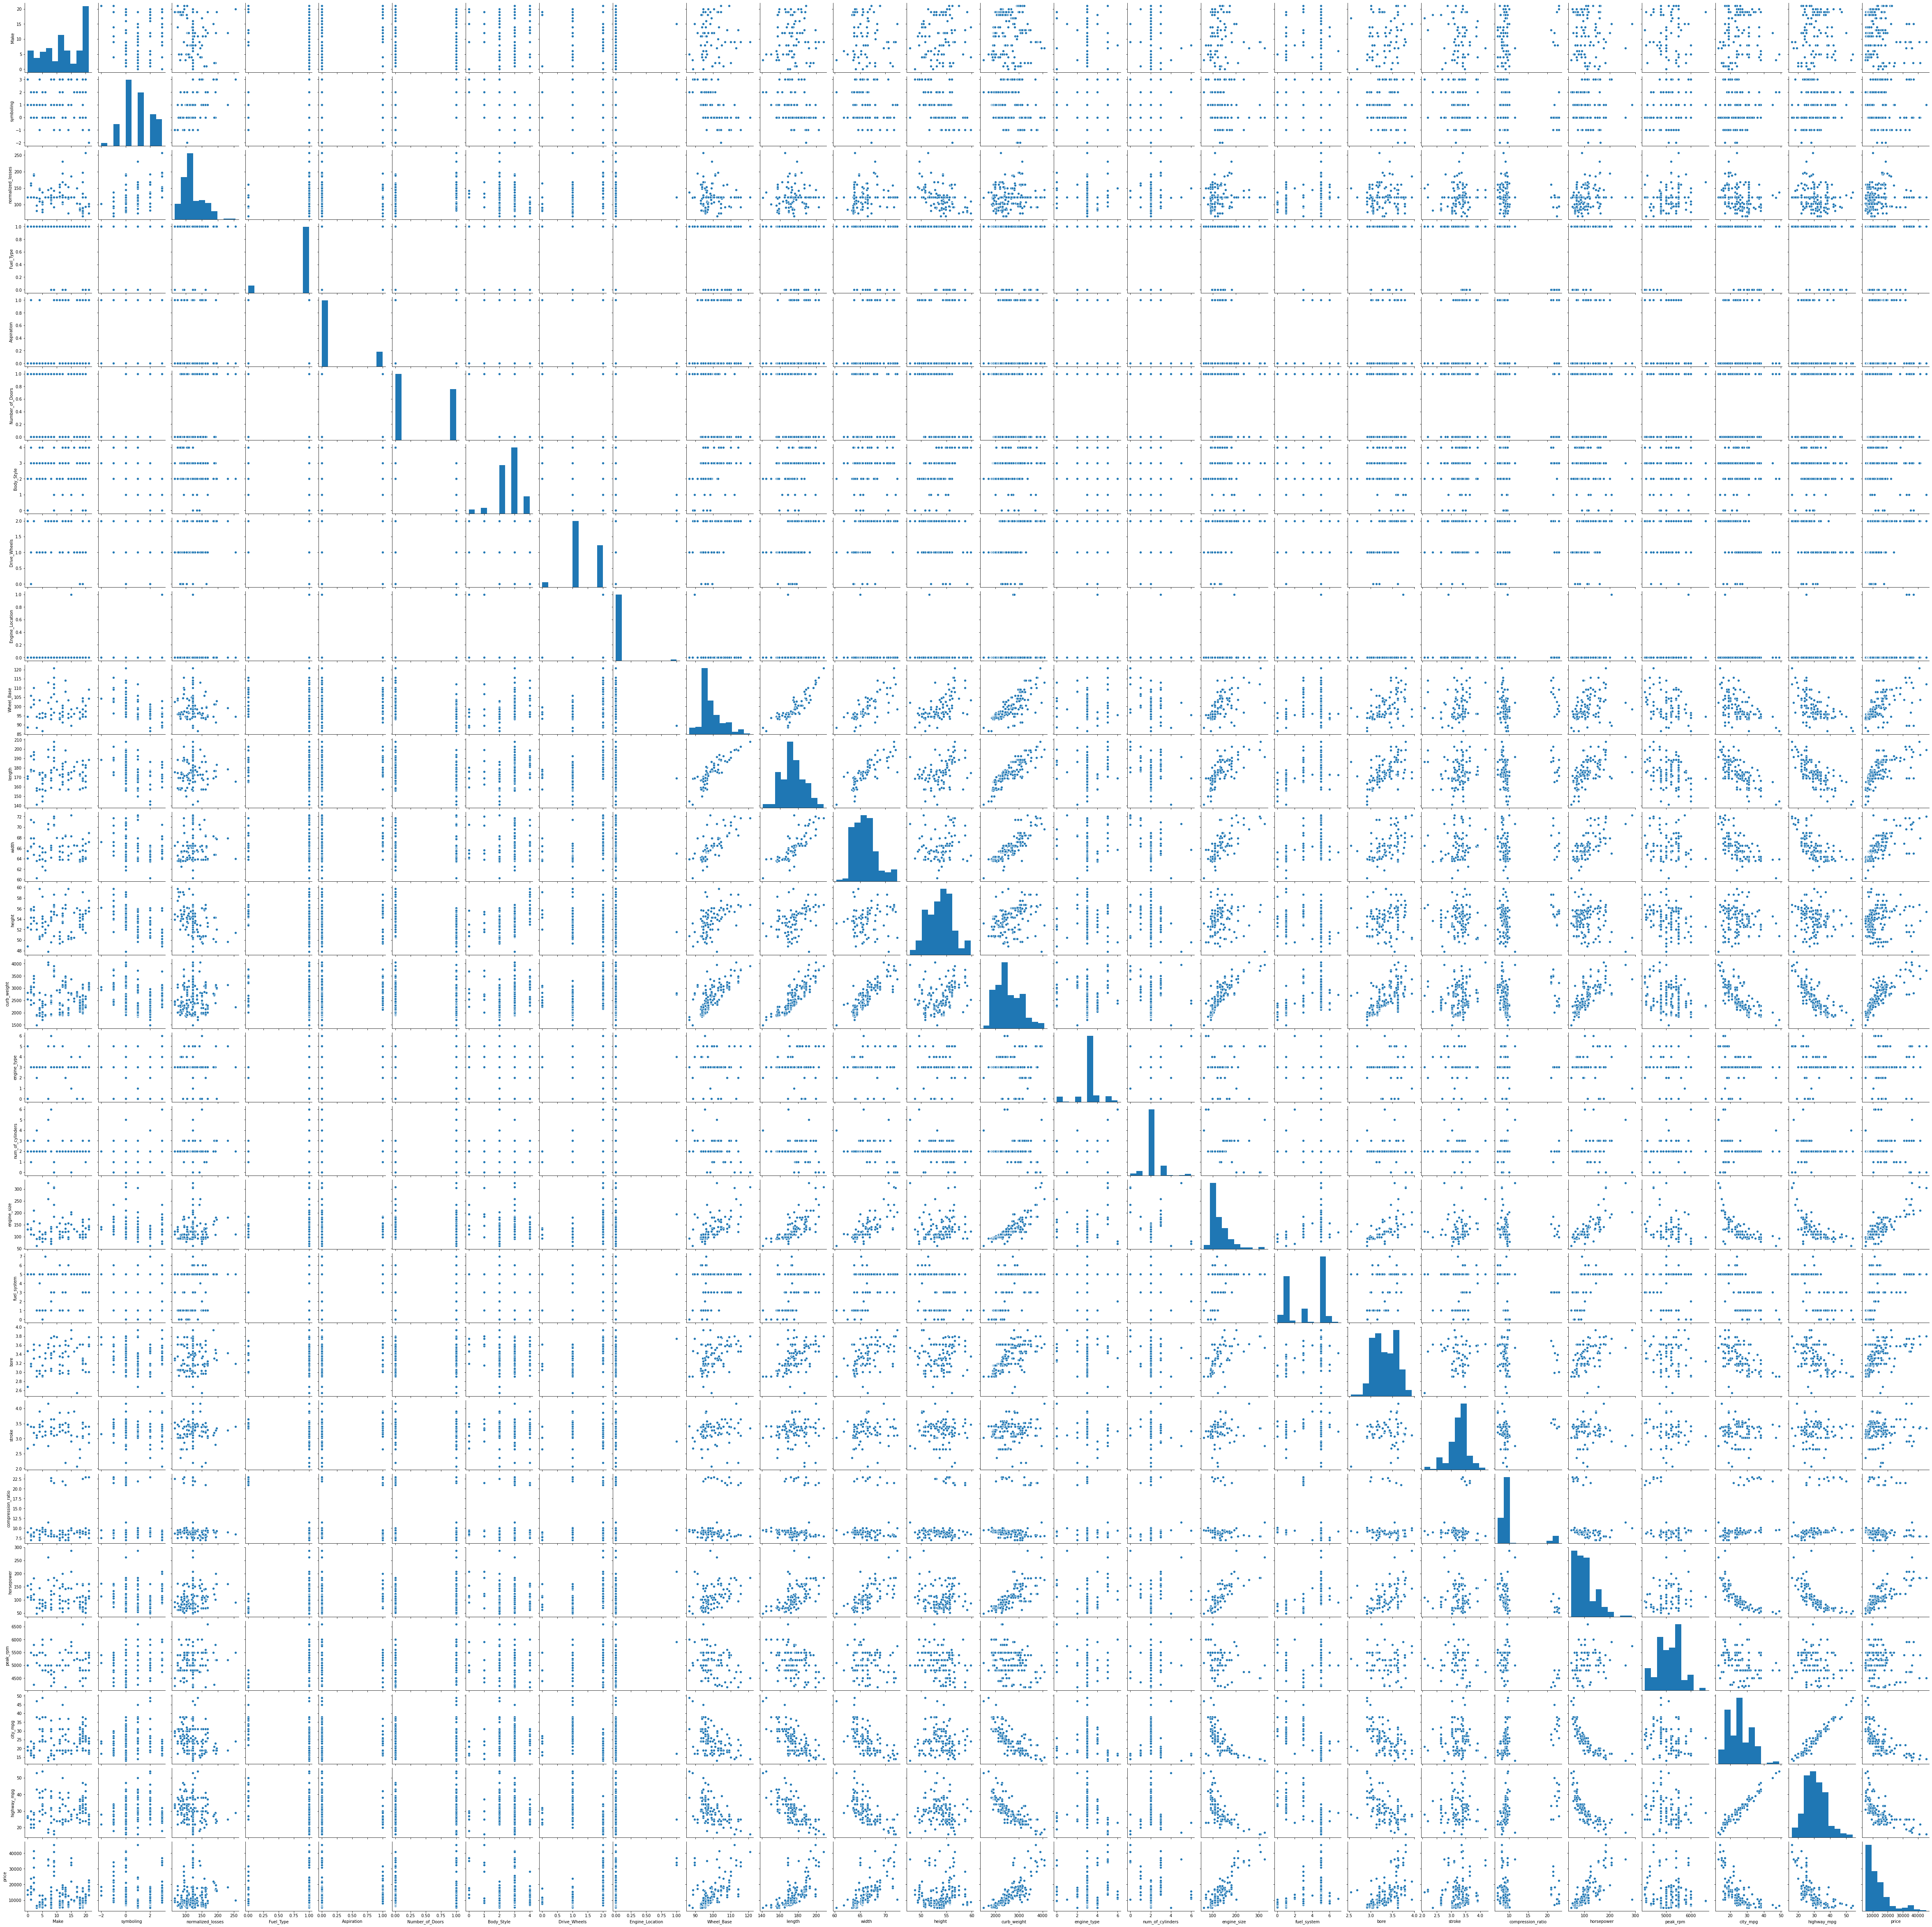

In [94]:
sns.pairplot(Car_Price)

#### Assumption 2: Error terms are normally distributed and there are no patterns

###### From the below diagram, we can infer that the error terms are more or less normally distributed and that the mean of error is at 0.

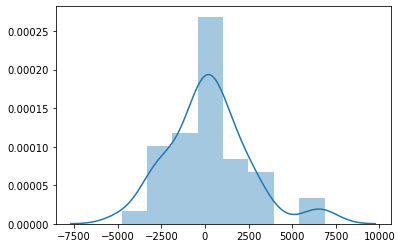

In [95]:
sns.distplot(Error)

#### Assumption 3: Multi-colinearity

###### From the below heat map, we might experience the problem of multicollinearity between several independent features/variables as there exists a high positive and negative correlation among them.

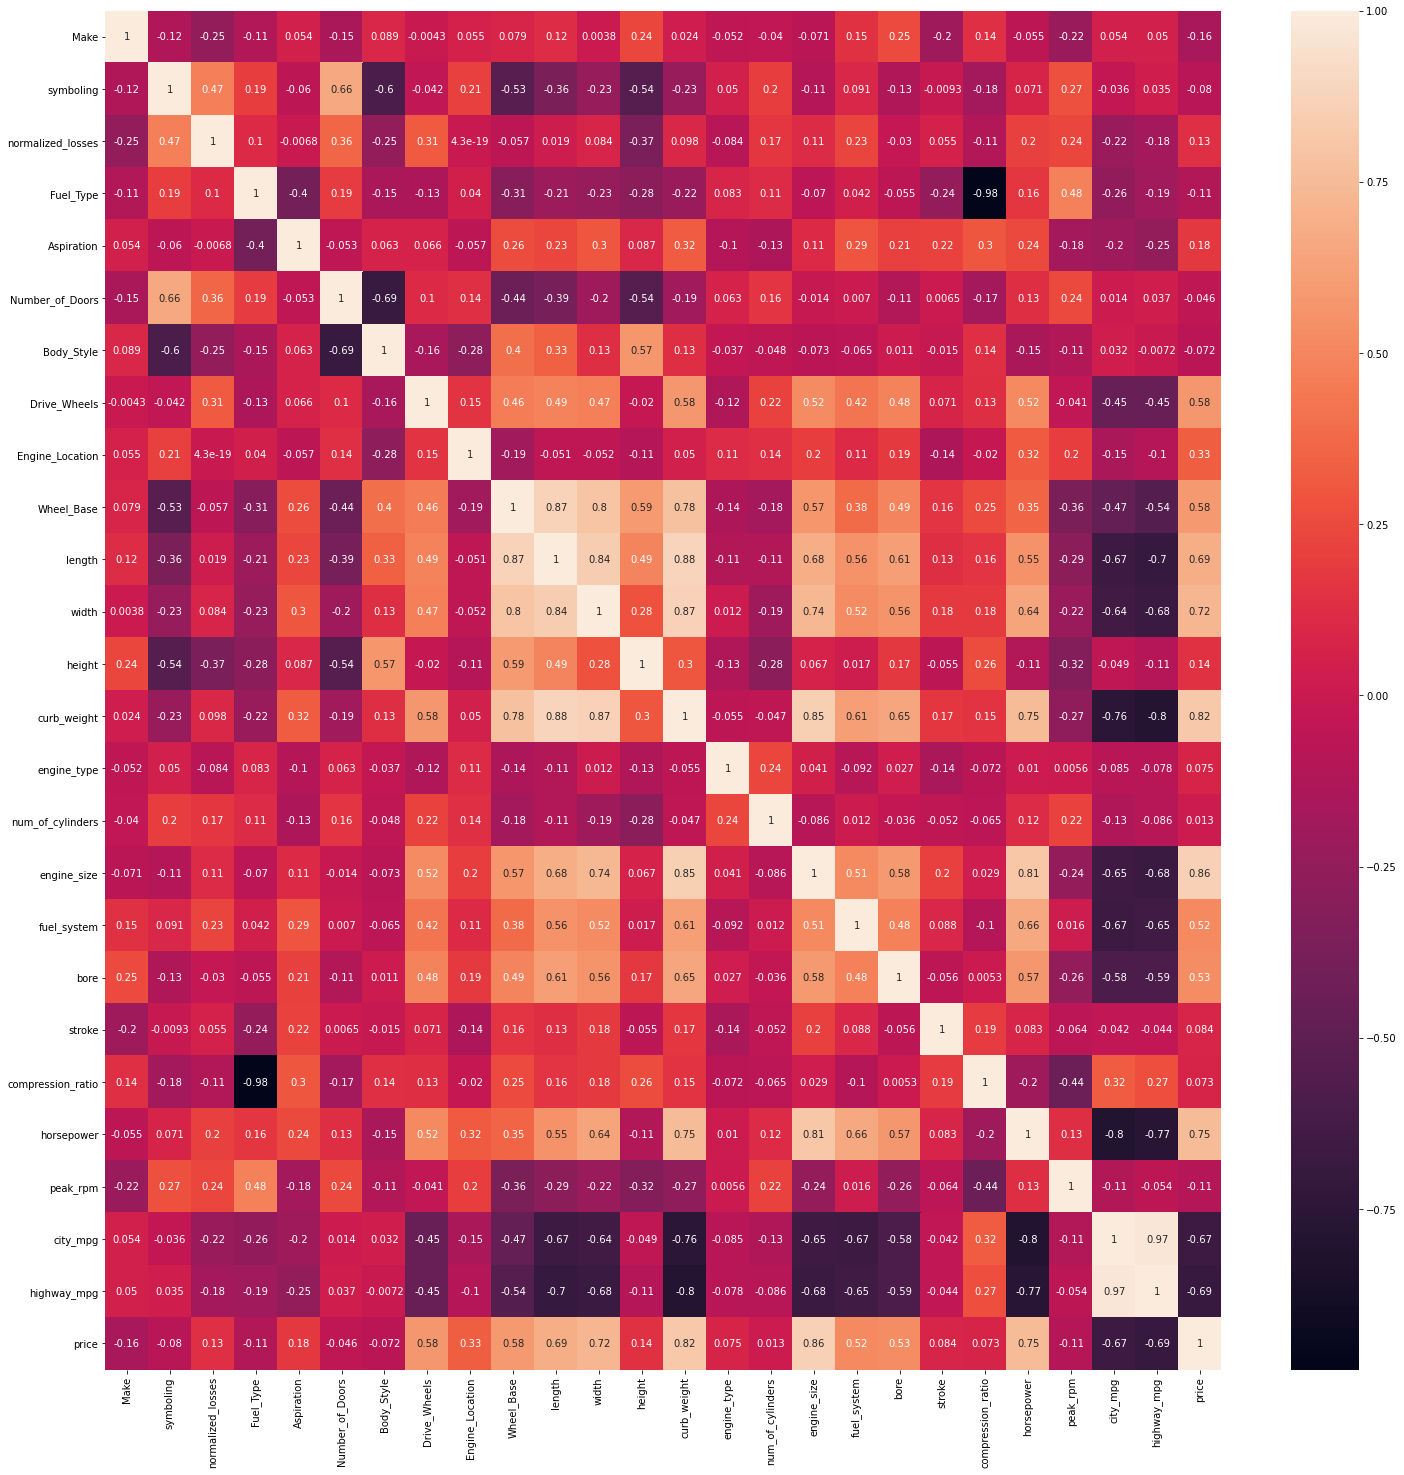

In [96]:
plt.figure(figsize=(25,25))
sns.heatmap(Car_Price.corr(),annot=True)
#double click on the graph to zoom in and see the patterns

#### Assumption 4: Homosedacity

###### From the below diagram, we can understand that the variance around the Regression is equally spread.

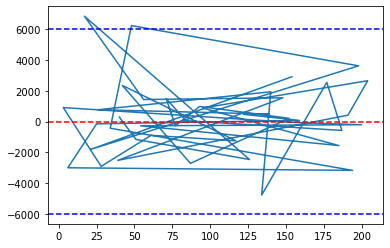

In [97]:
plt.plot(Error)
plt.axhline(y = 0 ,  linestyle ="--" , color = 'r')
plt.axhline(y = 6000 ,  linestyle ="--" , color = 'b')
plt.axhline(y = -6000 , linestyle ="--" , color = 'b')

## Building model after removing Outliers

In [98]:
Car_Price_2 = Car_Price

In [99]:
Car_Price_2.shape

(205, 26)

In [100]:
Car_Price_2.head()

Make  symboling  normalized_losses  Fuel_Type  Aspiration  Number_of_Doors  \
0     0          3              122.0          1           0                1   
1     0          3              122.0          1           0                1   
2     0          1              122.0          1           0                1   
3     1          2              164.0          1           0                0   
4     1          2              164.0          1           0                0   

   Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  length  width  \
0           0             2                0        88.6   168.8   64.1   
1           0             2                0        88.6   168.8   64.1   
2           2             2                0        94.5   171.2   65.5   
3           3             1                0        99.8   176.6   66.2   
4           3             0                0        99.4   176.6   66.4   

   height  curb_weight  engine_type  num_of_cylinders  engine_size  \
0    48.8         2548            0                 2          130   
1    48.8         2548            0                 2          130   
2    52.4         2823            5                 3          152   
3    54.3         2337            3                 2          109   
4    54.3         2824            3                 1          136   

   fuel_system  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0            5  3.47    2.68                9.0       111.0    5000.0   
1            5  3.47    2.68                9.0       111.0    5000.0   
2            5  2.68    3.47                9.0       154.0    5000.0   
3            5  3.19    3.40               10.0       102.0    5500.0   
4            5  3.19    3.40                8.0       115.0    5500.0   

   city_mpg  highway_mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [101]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#defining function for finding outliers

##### Removing outliers in normalized_losses and filling them with logical values

In [102]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.normalized_losses)
print("Lower Range of Normalised Losses: ", lowerbound)
print("Upper Range of Normalised Losses: ", upperbound)

Lower Range of Normalised Losses:  47.0
Upper Range of Normalised Losses:  191.0


In [103]:
Car_Price_2[(Car_Price_2.normalized_losses < lowerbound) | (Car_Price_2.normalized_losses > upperbound)]

Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
10      2          2              192.0          1           0   
11      2          0              192.0          1           0   
104    12          3              194.0          1           0   
105    12          3              194.0          1           1   
106    12          1              231.0          1           0   
178    19          3              197.0          1           0   
179    19          3              197.0          1           0   
190    20          3              256.0          1           0   

     Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
10                 1           3             2                0       101.2   
11                 0           3             2                0       101.2   
104                1           2             2                0        91.3   
105                1           2             2                0        91.3   
106                1           2             2                0        99.2   
178                1           2             2                0       102.9   
179                1           2             2                0       102.9   
190                1           2             1                0        94.5   

     length  width  height  curb_weight  engine_type  num_of_cylinders  \
10    176.8   64.8    54.3         2395            3                 2   
11    176.8   64.8    54.3         2395            3                 2   
104   170.7   67.9    49.7         3071            5                 3   
105   170.7   67.9    49.7         3139            5                 3   
106   178.5   67.9    49.7         3139            5                 3   
178   183.5   67.7    52.0         2976            0                 3   
179   183.5   67.7    52.0         3016            0                 3   
190   165.7   64.0    51.4         2221            3                 2   

     engine_size  fuel_system  bore  stroke  compression_ratio  horsepower  \
10           108            5  3.50    2.80                8.8       101.0   
11           108            5  3.50    2.80                8.8       101.0   
104          181            5  3.43    3.27                9.0       160.0   
105          181            5  3.43    3.27                7.8       200.0   
106          181            5  3.43    3.27                9.0       160.0   
178          171            5  3.27    3.35                9.3       161.0   
179          171            5  3.27    3.35                9.3       161.0   
190          109            5  3.19    3.40                8.5        90.0   

     peak_rpm  city_mpg  highway_mpg    price  
10     5800.0        23           29  16430.0  
11     5800.0        23           29  16925.0  
104    5200.0        19           25  17199.0  
105    5200.0        17           23  19699.0  
106    5200.0        19           25  18399.0  
178    5200.0        20           24  16558.0  
179    5200.0        19           24  15998.0  
190    5500.0        24           29   9980.0

In [104]:
Car_Price_2.loc[Car_Price_2.normalized_losses > upperbound, 'normalized_losses'] = np.nan
#Converting the outliers into Null values

In [105]:
Car_Price_2.isnull().sum()

Make                 0
symboling            0
normalized_losses    8
Fuel_Type            0
Aspiration           0
Number_of_Doors      0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [106]:
Car_Price_2.normalized_losses.describe()

count    197.000000
mean     118.563452
std       26.837612
min       65.000000
25%       98.000000
50%      122.000000
75%      134.000000
max      188.000000
Name: normalized_losses, dtype: float64

In [107]:
Car_Price_2.normalized_losses.fillna(122,inplace=True)
#Filling the null vaues with median

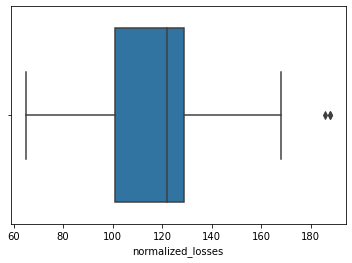

In [108]:
sns.boxplot(Car_Price_2.normalized_losses)
#Checking the column after removing outliers, the values beyond Q3 + (1.5 * IQR) are removed

##### Removing outliers in Engine Size and filling them with logical values

In [109]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.engine_size)
print("Lower Range of Engine Size: ", lowerbound)
print("Upper Range of Engine Size: ", upperbound)

Car_Price_2[(Car_Price_2.engine_size < lowerbound) | (Car_Price_2.engine_size > upperbound)]

Lower Range of Engine Size:  31.0
Upper Range of Engine Size:  207.0


Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
15     2          0              122.0          1           0   
16     2          0              122.0          1           0   
17     2          0              122.0          1           0   
47     7          0              145.0          1           0   
48     7          0              122.0          1           0   
49     7          0              122.0          1           0   
71     9         -1              122.0          1           0   
72     9          3              142.0          1           0   
73     9          0              122.0          1           0   
74     9          1              122.0          1           0   

    Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
15                0           3             2                0       103.5   
16                1           3             2                0       103.5   
17                0           3             2                0       110.0   
47                0           3             2                0       113.0   
48                0           3             2                0       113.0   
49                1           3             2                0       102.0   
71                0           3             2                0       115.6   
72                1           0             2                0        96.6   
73                0           3             2                0       120.9   
74                1           1             2                0       112.0   

    length  width  height  curb_weight  engine_type  num_of_cylinders  \
15   189.0   66.9    55.7         3230            3                 3   
16   193.8   67.9    53.7         3380            3                 3   
17   197.0   70.9    56.3         3505            3                 3   
47   199.6   69.6    52.8         4066            0                 3   
48   199.6   69.6    52.8         4066            0                 3   
49   191.7   70.6    47.8         3950            5                 5   
71   202.6   71.7    56.5         3740            5                 0   
72   180.3   70.5    50.8         3685            5                 0   
73   208.1   71.7    56.7         3900            5                 0   
74   199.2   72.0    55.4         3715            5                 0   

    engine_size  fuel_system  bore  stroke  compression_ratio  horsepower  \
15          209            5  3.62    3.39                8.0       182.0   
16          209            5  3.62    3.39                8.0       182.0   
17          209            5  3.62    3.39                8.0       182.0   
47          258            5  3.63    4.17                8.1       176.0   
48          258            5  3.63    4.17                8.1       176.0   
49          326            5  3.54    2.76               11.5       262.0   
71          234            5  3.46    3.10                8.3       155.0   
72          234            5  3.46    3.10                8.3       155.0   
73          308            5  3.80    3.35                8.0       184.0   
74          304            5  3.80    3.35                8.0       184.0   

    peak_rpm  city_mpg  highway_mpg    price  
15    5400.0        16           22  30760.0  
16    5400.0        16           22  41315.0  
17    5400.0        15           20  36880.0  
47    4750.0        15           19  32250.0  
48    4750.0        15           19  35550.0  
49    5000.0        13           17  36000.0  
71    4750.0        16           18  34184.0  
72    4750.0        16           18  35056.0  
73    4500.0        14           16  40960.0  
74    4500.0        14           16  45400.0

In [110]:
Car_Price_2.loc[Car_Price_2.engine_size > upperbound, 'engine_size'] = np.nan
#Converting the outliers into Null values

In [111]:
Car_Price_2.isnull().sum()

Make                  0
symboling             0
normalized_losses     0
Fuel_Type             0
Aspiration            0
Number_of_Doors       0
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size          10
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [112]:
Car_Price_2.engine_size.describe()

count    195.000000
mean     120.343590
std       29.078456
min       61.000000
25%       97.000000
50%      110.000000
75%      140.000000
max      203.000000
Name: engine_size, dtype: float64

In [113]:
Car_Price_2.engine_size.fillna(110,inplace=True)
#Filling the null vaues with median

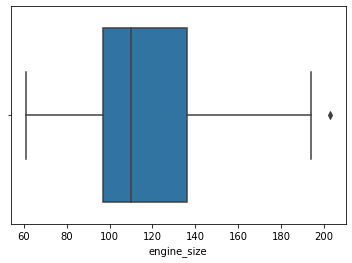

In [114]:
sns.boxplot(Car_Price_2.engine_size)
#Checking the column after removing outliers, the values beyond Q3 + (1.5 * IQR) are removed

##### Removing outliers in Stroke and filling them with logical values

In [115]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.stroke)
print("Lower Range of Stroke: ", lowerbound)
print("Upper Range of Stroke: ", upperbound)


Car_Price_2[(Car_Price_2.stroke < lowerbound) | (Car_Price_2.stroke > upperbound)]

Lower Range of Stroke:  2.6599999999999993
Upper Range of Stroke:  3.8600000000000003


Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
29      4          3              145.0          1           1   
47      7          0              145.0          1           0   
48      7          0              122.0          1           0   
111    13          0              161.0          1           0   
113    13          0              122.0          1           0   
130    16          0              122.0          1           0   
131    16          2              122.0          1           0   
134    17          3              150.0          1           0   
138    18          2               83.0          1           0   
139    18          2               83.0          1           0   
140    18          2               83.0          1           0   
141    18          0              102.0          1           0   
142    18          0              102.0          1           0   
143    18          0              102.0          1           0   
144    18          0              102.0          1           0   
145    18          0              102.0          1           1   
146    18          0               89.0          1           0   
147    18          0               89.0          1           0   
148    18          0               85.0          1           0   
149    18          0               85.0          1           1   

     Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
29                 1           2             1                0        95.9   
47                 0           3             2                0       113.0   
48                 0           3             2                0       113.0   
111                0           3             2                0       107.9   
113                0           4             2                0       114.2   
130                0           4             1                0        96.1   
131                1           2             1                0        96.1   
134                1           2             1                0        99.1   
138                1           2             1                0        93.7   
139                1           2             1                0        93.7   
140                1           2             0                0        93.3   
141                0           3             1                0        97.2   
142                0           3             1                0        97.2   
143                0           3             1                0        97.2   
144                0           3             0                0        97.0   
145                0           3             0                0        97.0   
146                0           4             1                0        97.0   
147                0           4             1                0        97.0   
148                0           4             0                0        96.9   
149                0           4             0                0        96.9   

     length  width  height  curb_weight  engine_type  num_of_cylinders  \
29    173.2   66.3    50.2         2811            3                 2   
47    199.6   69.6    52.8         4066            0                 3   
48    199.6   69.6    52.8         4066            0                 3   
111   186.7   68.4    56.7         3075            2                 2   
113   198.9   68.4    56.7         3285            2                 2   
130   181.5   66.5    55.2         2579            3                 2   
131   176.8   66.6    50.5         2460            3                 2   
134   186.6   66.5    56.1         2707            3                 2   
138   156.9   63.4    53.7         2050            4                 2   
139   157.9   63.6    53.7         2120            4                 2   
140   157.3   63.8    55.7         2240            4                 2   
141   172.0   65.4    52.5         2145            4                 2

In [116]:
Car_Price_2.loc[Car_Price_2.stroke > upperbound, 'stroke'] = np.nan
Car_Price_2.loc[Car_Price_2.stroke < lowerbound, 'stroke'] = np.nan
#Converting the outliers into Null values

In [117]:
Car_Price_2.isnull().sum()

Make                  0
symboling             0
normalized_losses     0
Fuel_Type             0
Aspiration            0
Number_of_Doors       0
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke               20
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [118]:
Car_Price_2.stroke.describe()

count    185.000000
mean       3.294324
std        0.211354
min        2.680000
25%        3.150000
50%        3.290000
75%        3.410000
max        3.860000
Name: stroke, dtype: float64

In [119]:
Car_Price_2.stroke.fillna(3.29,inplace=True)
#Filling the null vaues with median

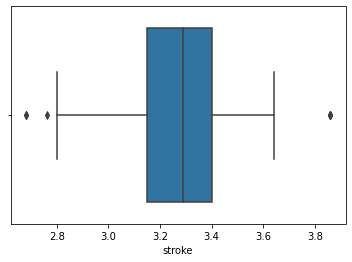

In [120]:
sns.boxplot(Car_Price_2.stroke)
#Checking the column after removing outliers, the values below Q1 - (1.5 * IQR) and beyond Q3 + (1.5 * IQR) are removed

##### Dropping Compressed Ratio

In [121]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.compression_ratio)
print("Lower Range of Compressed Ratio: ", lowerbound)
print("Upper Range of Compressed Ratio: ", upperbound)


Car_Price_2[(Car_Price_2.compression_ratio < lowerbound) | (Car_Price_2.compression_ratio > upperbound)]

Lower Range of Compressed Ratio:  7.399999999999999
Upper Range of Compressed Ratio:  10.600000000000001


Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
9       1          0              122.0          1           1   
29      4          3              145.0          1           1   
49      7          0              122.0          1           0   
63      8          0              122.0          0           0   
66      8          0              122.0          0           0   
67      9         -1               93.0          0           1   
68      9         -1               93.0          0           1   
69      9          0               93.0          0           1   
70      9         -1               93.0          0           1   
82     11          3              122.0          1           1   
83     11          3              122.0          1           1   
84     11          3              122.0          1           1   
90     12          1              128.0          0           0   
108    13          0              161.0          0           1   
110    13          0              122.0          0           1   
112    13          0              161.0          0           1   
114    13          0              122.0          0           1   
116    13          0              161.0          0           1   
117    13          0              161.0          1           1   
124    14          3              122.0          1           1   
158    19          0               91.0          0           0   
159    19          0               91.0          0           0   
174    19         -1               65.0          0           1   
182    20          2              122.0          0           0   
184    20          2               94.0          0           0   
187    20          2               94.0          0           1   
192    20          0              122.0          0           1   
203    21         -1               95.0          0           1   

     Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
9                  1           2             0                0        99.5   
29                 1           2             1                0        95.9   
49                 1           3             2                0       102.0   
63                 0           3             1                0        98.8   
66                 0           3             2                0       104.9   
67                 0           3             2                0       110.0   
68                 0           4             2                0       110.0   
69                 1           1             2                0       106.7   
70                 0           3             2                0       115.6   
82                 1           2             1                0        95.9   
83                 1           2             1                0        95.9   
84                 1           2             1                0        95.9   
90                 1           3             1                0        94.5   
108                0           3             2                0       107.9   
110                0           4             2                0       114.2   
112                0           3             2                0       107.9   
114                0           4             2                0       114.2   
116                0           3             2                0       107.9   
117                0           3             2                0       108.0   
124                1           2             2                0        95.9   
158                0           3             1                0        95.7   
159                0           2             1                0        95.7   
174                0           3             1                0       102.4   
182                1           3             1                0        97.3   
184                0           3             1                0        97.3   
187                0           3    

In [122]:
Car_Price_2.drop(['compression_ratio'], axis=1, inplace=True)
#Since there are too many outliers in the Compression Ratio, we are removing that column

In [123]:
Car_Price_2.head(1)

Make  symboling  normalized_losses  Fuel_Type  Aspiration  Number_of_Doors  \
0     0          3              122.0          1           0                1   

   Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  length  width  \
0           0             2                0        88.6   168.8   64.1   

   height  curb_weight  engine_type  num_of_cylinders  engine_size  \
0    48.8         2548            0                 2        130.0   

   fuel_system  bore  stroke  horsepower  peak_rpm  city_mpg  highway_mpg  \
0            5  3.47    2.68       111.0    5000.0        21           27   

     price  
0  13495.0

##### Removing outliers in Horsepower and filling them with logical values

In [124]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.horsepower)
print("Lower Range of Horsepower: ", lowerbound)
print("Upper Range of Horsepower: ", upperbound)


Car_Price_2[(Car_Price_2.horsepower < lowerbound) | (Car_Price_2.horsepower > upperbound)]

Lower Range of Horsepower:  1.0
Upper Range of Horsepower:  185.0


Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
49      7          0              122.0          1           0   
105    12          3              122.0          1           1   
126    15          3              122.0          1           0   
127    15          3              122.0          1           0   
128    15          3              122.0          1           0   
129    15          1              122.0          1           0   

     Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
49                 1           3             2                0       102.0   
105                1           2             2                0        91.3   
126                1           1             2                1        89.5   
127                1           1             2                1        89.5   
128                1           0             2                1        89.5   
129                1           2             2                0        98.4   

     length  width  height  curb_weight  engine_type  num_of_cylinders  \
49    191.7   70.6    47.8         3950            5                 5   
105   170.7   67.9    49.7         3139            5                 3   
126   168.9   65.0    51.6         2756            4                 3   
127   168.9   65.0    51.6         2756            4                 3   
128   168.9   65.0    51.6         2800            4                 3   
129   175.7   72.3    50.5         3366            1                 0   

     engine_size  fuel_system  bore  stroke  horsepower  peak_rpm  city_mpg  \
49         110.0            5  3.54    2.76       262.0    5000.0        13   
105        181.0            5  3.43    3.27       200.0    5200.0        17   
126        194.0            5  3.74    2.90       207.0    5900.0        17   
127        194.0            5  3.74    2.90       207.0    5900.0        17   
128        194.0            5  3.74    2.90       207.0    5900.0        17   
129        203.0            5  3.94    3.11       288.0    5750.0        17   

     highway_mpg    price  
49            17  36000.0  
105           23  19699.0  
126           25  32528.0  
127           25  34028.0  
128           25  37028.0  
129           28  10295.0

In [125]:
Car_Price_2.loc[Car_Price_2.horsepower > upperbound, 'horsepower'] = np.nan
#Converting the outliers into Null values

In [126]:
Car_Price_2.isnull().sum()

Make                 0
symboling            0
normalized_losses    0
Fuel_Type            0
Aspiration           0
Number_of_Doors      0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
horsepower           6
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [127]:
Car_Price_2.horsepower.describe()

count    199.000000
mean     100.417085
std       33.056302
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      184.000000
Name: horsepower, dtype: float64

In [128]:
Car_Price_2.horsepower.fillna(95,inplace=True)
#Filling the null vaues with median

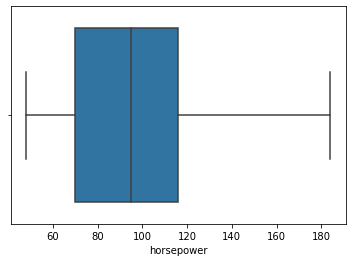

In [129]:
sns.boxplot(Car_Price_2.horsepower)
#Checking the column after removing outliers, the values beyond Q3 + (1.5 * IQR) are removed

##### Removing outliers in Price and filling them with logical values

In [130]:
lowerbound,upperbound = outlier_treatment(Car_Price_2.price)
print("Lower Range of Price: ", lowerbound)
print("Upper Range of Price: ", upperbound)


Car_Price_2[Car_Price_2.price > upperbound]

Lower Range of Price:  -5280.0
Upper Range of Price:  29568.0


Make  symboling  normalized_losses  Fuel_Type  Aspiration  \
15      2          0              122.0          1           0   
16      2          0              122.0          1           0   
17      2          0              122.0          1           0   
47      7          0              145.0          1           0   
48      7          0              122.0          1           0   
49      7          0              122.0          1           0   
70      9         -1               93.0          0           1   
71      9         -1              122.0          1           0   
72      9          3              142.0          1           0   
73      9          0              122.0          1           0   
74      9          1              122.0          1           0   
126    15          3              122.0          1           0   
127    15          3              122.0          1           0   
128    15          3              122.0          1           0   

     Number_of_Doors  Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  \
15                 0           3             2                0       103.5   
16                 1           3             2                0       103.5   
17                 0           3             2                0       110.0   
47                 0           3             2                0       113.0   
48                 0           3             2                0       113.0   
49                 1           3             2                0       102.0   
70                 0           3             2                0       115.6   
71                 0           3             2                0       115.6   
72                 1           0             2                0        96.6   
73                 0           3             2                0       120.9   
74                 1           1             2                0       112.0   
126                1           1             2                1        89.5   
127                1           1             2                1        89.5   
128                1           0             2                1        89.5   

     length  width  height  curb_weight  engine_type  num_of_cylinders  \
15    189.0   66.9    55.7         3230            3                 3   
16    193.8   67.9    53.7         3380            3                 3   
17    197.0   70.9    56.3         3505            3                 3   
47    199.6   69.6    52.8         4066            0                 3   
48    199.6   69.6    52.8         4066            0                 3   
49    191.7   70.6    47.8         3950            5                 5   
70    202.6   71.7    56.3         3770            3                 1   
71    202.6   71.7    56.5         3740            5                 0   
72    180.3   70.5    50.8         3685            5                 0   
73    208.1   71.7    56.7         3900            5                 0   
74    199.2   72.0    55.4         3715            5                 0   
126   168.9   65.0    51.6         2756            4                 3   
127   168.9   65.0    51.6         2756            4                 3   
128   168.9   65.0    51.6         2800            4                 3   

     engine_size  fuel_system  bore  stroke  horsepower  peak_rpm  city_mpg  \
15         110.0            5  3.62    3.39       182.0    5400.0        16   
16         110.0            5  3.62    3.39       182.0    5400.0        16   
17         110.0            5  3.62    3.39       182.0    5400.0        15   
47         110.0            5  3.63    3.29       176.0    4750.0        15   
48         110.0            5  3.63    3.29       176.0    4750.0        15   
49         110.0            5  3.54    2.76        95.0    5000.0        13   
70         183.0            3  3.58    3.64       123.0    4350.0        22   
71         110.0            5  3.46    3.10       155.0    4750.0        16   
72    

In [131]:
Car_Price_2.loc[Car_Price_2.price > upperbound, 'price'] = np.nan
#Converting the outliers into Null values

In [132]:
Car_Price_2.isnull().sum()

Make                  0
symboling             0
normalized_losses     0
Fuel_Type             0
Aspiration            0
Number_of_Doors       0
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                14
dtype: int64

In [133]:
Car_Price_2.price.describe()

count      191.000000
mean     11477.874346
std       4929.765412
min       5118.000000
25%       7713.500000
50%       9988.000000
75%      14954.500000
max      28248.000000
Name: price, dtype: float64

In [134]:
Car_Price_2.price.fillna(28000,inplace=True)
#Filling the null vaues with maximum price as all the outliers are ranging between 30,000 to 45,000 because filling them with mean or median would affect the model to a greater extent

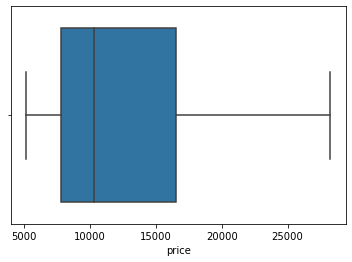

In [135]:
sns.boxplot(Car_Price_2.price)
#Checking the column after removing outliers, the values beyond Q3 + (1.5 * IQR) are removed

## Linear Regression Model (after removing outlier)

### Spliting the dataset

In [136]:
x_2 = Car_Price_2.iloc[:,:-1]
y_2 = Car_Price_2.iloc[:,-1:]

In [137]:
x_2.head(1)

Make  symboling  normalized_losses  Fuel_Type  Aspiration  Number_of_Doors  \
0     0          3              122.0          1           0                1   

   Body_Style  Drive_Wheels  Engine_Location  Wheel_Base  length  width  \
0           0             2                0        88.6   168.8   64.1   

   height  curb_weight  engine_type  num_of_cylinders  engine_size  \
0    48.8         2548            0                 2        130.0   

   fuel_system  bore  stroke  horsepower  peak_rpm  city_mpg  highway_mpg  
0            5  3.47    2.68       111.0    5000.0        21           27

In [138]:
y_2.head(1)

price
0  13495.0

### Spliting the dataset into Train and Test

In [139]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split( x_2, y_2, test_size = 0.10, random_state=5)

In [140]:
#Testing the shape
print(x_train_2.shape)
print(y_train_2.shape)
print('-----------')
print(x_test_2.shape)
print(y_test_2.shape)

(184, 24)
(184, 1)
-----------
(21, 24)
(21, 1)


### Building the model

In [141]:
Lin_Reg.fit(x_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Intercept:

In [142]:
Lin_Reg.intercept_

array([-31415.02419047])

##### Coefficients:

In [143]:
Lin_Reg.coef_

array([[-1.76874517e+02,  9.57952033e+01, -3.86696499e+00,
        -2.47113002e+03, -6.91106861e+01, -8.85574465e+02,
        -4.27796857e+02,  1.67774573e+03,  1.53804435e+04,
        -8.58035799e+00,  1.08132745e+01,  6.04581411e+02,
         1.27381860e+02,  4.58137655e+00,  3.89168422e+02,
         2.91163368e+01, -1.86192814e+01,  1.48723136e+02,
        -1.02817652e+03, -3.77892698e+03,  6.34428300e+01,
        -4.73145841e-01,  1.02716577e+02, -5.66803607e+01]])

### Prediction

In [144]:
y_predict_train = Lin_Reg.predict(x_train_2)
y_predict_train

array([[11420.07675558],
       [ 9436.57800597],
       [19144.01220911],
       [10000.68252508],
       [10716.31398392],
       [13034.11116587],
       [ 7685.8845622 ],
       [16370.26405367],
       [ 7984.47148828],
       [ 8216.29093237],
       [ 6062.56842633],
       [16564.27956265],
       [11489.78050555],
       [ 9254.37382934],
       [ 6803.83357387],
       [13793.19487356],
       [27457.48562925],
       [27790.20752504],
       [ 7300.57434955],
       [ 7933.53762527],
       [14405.13718226],
       [ 7208.69731784],
       [ 6300.10366249],
       [15806.87496685],
       [17601.94979406],
       [17133.78235354],
       [ 7859.59426317],
       [29138.08682755],
       [16629.00399543],
       [ 7548.80653217],
       [ 8012.97343162],
       [13793.19487356],
       [ 9455.09850885],
       [ 7854.08499494],
       [16096.83854518],
       [11606.60299248],
       [19917.64611715],
       [11229.20127778],
       [ 9186.07774461],
       [14154.68050745],


In [145]:
y_predict_2 = Lin_Reg.predict(x_test_2)
y_predict_2

array([[ 5911.02023386],
       [ 7144.85823273],
       [18983.35771884],
       [27097.5202299 ],
       [ 6815.73721233],
       [15162.84269   ],
       [18474.56979792],
       [ 7532.58769051],
       [ 9020.3011197 ],
       [ 6650.73366178],
       [ 5706.15576413],
       [ 7532.58769051],
       [ 4950.79939968],
       [13407.78951287],
       [10306.22536551],
       [11069.62858602],
       [13145.1607817 ],
       [28483.88871841],
       [ 6027.03783427],
       [ 6246.11523131],
       [ 6673.22665428]])

### Evaluation

In [146]:
print('Error:')
Error_2 =  y_test_2 - y_predict_2
Error_2

Error:


price
154  1986.979766
21  -1572.858233
198  -563.357719
48    902.479770
34    313.262788
194 -2222.842690
6    -764.569798
25   -840.587691
159 -1232.301120
122   958.266338
139  1346.844236
26     76.412309
140  2652.200600
134  1632.210487
177   941.774634
187 -1574.628586
84   1343.839218
71   -483.888718
77    161.962166
93   1102.884769
152  -185.226654

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_2, y_predict_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train_2, y_predict_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_2, y_predict_train)))
#train data

Mean Absolute Error: 1660.7319205243523
Mean Squared Error: 5046067.191079886
Root Mean Squared Error: 2246.345296493815


In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_predict_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_predict_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_predict_2)))
#test data

Mean Absolute Error: 1088.541823359892
Mean Squared Error: 1643924.8151495343
Root Mean Squared Error: 1282.1563146315407


###### From the below R-Squared and Adjusted R-Square value, we can understand that the Linear Model after removing outliers has slightly improved the performance and thus it has increased the R-Square value as well as the Adjusted R-Square Value by few percentages with test size = 10

## R-Squared Value

In [149]:
Rsquare_train = metrics.r2_score(y_train_2 , y_predict_train)
print("Value of Rsquare is: " , Rsquare_train * 100 )
#train data

Value of Rsquare is:  87.19023061828398


In [150]:
Rsquare = metrics.r2_score(y_test_2 , y_predict_2)
print("Value of Rsquare is: " , Rsquare * 100 )

Value of Rsquare is:  96.15744686705146


## Adjusted R-Square Value

In [151]:
K = 24
N  = 164
Adjusted_Rsquare_train = 1 - ( 1 - Rsquare_train ) * ( N - 1 ) / ( N - K -1 )
print("Adjusted Rsquare is: ", Adjusted_Rsquare_train *100)
#train data

Adjusted Rsquare is:  84.97847187611718


In [152]:
K = 24
N  = 41
Adjusted_Rsquare = 1 - ( 1 - Rsquare ) * ( N - 1 ) / ( N - K -1 )
print("Adjusted Rsquare is: ", Adjusted_Rsquare*100)

Adjusted Rsquare is:  90.39361716762866


## Feature Selection

### (i) Variance Inflation Factor (VIF)

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
VIF = pd.DataFrame()
VIF["VIF_Values"] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF["Variables"]  = x.columns

###### Here is the table of importance score (VIF Score)

###### Based on the below VIF Table, initially we can try removing Width, Wheel Base, Length, Height variables and then perform the Model and if required then additional features with high VIF score can be removed

In [155]:
VIF

VIF_Values          Variables
0      7.267156               Make
1      4.686182          symboling
2     29.275030  normalized_losses
3    851.176745          Fuel_Type
4      3.462156         Aspiration
5      5.006149    Number_of_Doors
6     29.762915         Body_Style
7     18.268524       Drive_Wheels
8      1.772830    Engine_Location
9   2936.593849         Wheel_Base
10  2356.202755             length
11  6218.430412              width
12  1290.899552             height
13   476.158044        curb_weight
14    14.932696        engine_type
15    16.621169   num_of_cylinders
16   142.499466        engine_size
17     9.216087        fuel_system
18   349.529590               bore
19   167.217117             stroke
20   613.455107  compression_ratio
21   117.390713         horsepower
22   325.261658           peak_rpm
23   534.024063           city_mpg
24   599.334616        highway_mpg

### (ii) Lasso

In [156]:
from sklearn.linear_model import Lasso
Lasso = Lasso(normalize=True)
Lasso.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [157]:
Lasso.coef_ 

array([-1.98646659e+02,  2.34629568e+02, -6.85455612e+00,  0.00000000e+00,
        2.41905294e+03, -8.09581497e+02, -9.18512832e+02,  1.46937111e+03,
        1.31340983e+04,  6.37459370e+01,  5.20988572e+01,  4.63735118e+02,
        3.08169009e+02,  1.43177846e+00,  2.58922473e+02,  8.43469813e+02,
        1.34512590e+02,  2.14325744e+02, -1.57579455e+03, -3.05341104e+03,
       -0.00000000e+00, -4.21271205e+01,  2.05937408e+00,  0.00000000e+00,
       -2.03055550e+00])

In [158]:
Lasso_Score  = pd.DataFrame({"Feature" : x.columns , "Score": Lasso.coef_})
Lasso_Score

Feature         Score
0                Make   -198.646659
1           symboling    234.629568
2   normalized_losses     -6.854556
3           Fuel_Type      0.000000
4          Aspiration   2419.052944
5     Number_of_Doors   -809.581497
6          Body_Style   -918.512832
7        Drive_Wheels   1469.371106
8     Engine_Location  13134.098291
9          Wheel_Base     63.745937
10             length     52.098857
11              width    463.735118
12             height    308.169009
13        curb_weight      1.431778
14        engine_type    258.922473
15   num_of_cylinders    843.469813
16        engine_size    134.512590
17        fuel_system    214.325744
18               bore  -1575.794552
19             stroke  -3053.411039
20  compression_ratio     -0.000000
21         horsepower    -42.127121
22           peak_rpm      2.059374
23           city_mpg      0.000000
24        highway_mpg     -2.030556

### (iii) Ridge

In [159]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
Ridge.coef_

array([[-1.98750998e+02,  3.38612189e+02, -9.01421447e+00,
        -4.28151693e+02,  2.41943022e+03, -1.13464295e+03,
        -1.14239604e+03,  1.54538244e+03,  8.47676516e+03,
         3.27586268e+01,  5.69456006e+01,  3.99398453e+02,
         3.92274743e+02,  1.16426798e+00,  3.10286691e+02,
         9.20634131e+02,  1.42705895e+02,  2.23734487e+02,
        -1.13535320e+03, -3.14922271e+03, -4.15738509e+00,
        -4.02963550e+01,  2.55033212e+00,  3.68481552e+01,
        -2.67714909e+01]])

### (iv) RFE

In [161]:
from sklearn.feature_selection import RFE

In [162]:
RFE_Lin = RFE(Lin_Reg , 10)

RFE_Lin.fit(x , y)

RFE_Lin.support_

C:\Users\muhil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True])

### (v) Correlation

In [163]:
Car_Price.corr()

Make  symboling  normalized_losses  Fuel_Type  \
Make               1.000000  -0.118794          -0.319670  -0.113191   
symboling         -0.118794   1.000000           0.415214   0.194311   
normalized_losses -0.319670   0.415214           1.000000   0.080759   
Fuel_Type         -0.113191   0.194311           0.080759   1.000000   
Aspiration         0.054265  -0.059866           0.016037  -0.401397   
Number_of_Doors   -0.151516   0.663595           0.312654   0.188496   
Body_Style         0.089494  -0.596135          -0.242187  -0.147853   
Drive_Wheels      -0.004317  -0.041671           0.266699  -0.132257   
Engine_Location    0.054608   0.212471           0.015332   0.040070   
Wheel_Base         0.078505  -0.531954          -0.048487  -0.308346   
length             0.119584  -0.357612           0.012757  -0.212679   
width              0.003783  -0.232919           0.069920  -0.233880   
height             0.236233  -0.541038          -0.331339  -0.284631   
curb_weight        0.024015  -0.227691           0.067115  -0.217275   
engine_type       -0.051538   0.050372          -0.109515   0.082695   
num_of_cylinders  -0.039937   0.197762           0.125062   0.110617   
engine_size        0.108551  -0.048777           0.025875  -0.183790   
fuel_system        0.146624   0.091163           0.165142   0.041529   
bore               0.251621  -0.131309          -0.050866  -0.054688   
stroke            -0.064512  -0.044462          -0.034242  -0.314607   
horsepower        -0.081056  -0.016216           0.149372   0.159933   
peak_rpm          -0.217386   0.273851           0.218161   0.477507   
city_mpg           0.053642  -0.035823          -0.176523  -0.255963   
highway_mpg        0.050022   0.034606          -0.130937  -0.191392   
price             -0.137294  -0.096316           0.130584  -0.158874   

                   Aspiration  Number_of_Doors  Body_Style  Drive_Wheels  \
Make                 0.054265        -0.151516    0.089494     -0.004317   
symboling           -0.059866         0.663595   -0.596135     -0.041671   
normalized_losses    0.016037         0.312654   -0.242187      0.266699   
Fuel_Type           -0.401397         0.188496   -0.147853     -0.132257   
Aspiration           1.000000        -0.052803    0.063028      0.066465   
Number_of_Doors     -0.052803         1.000000   -0.685640      0.104877   
Body_Style           0.063028        -0.685640    1.000000     -0.155745   
Drive_Wheels         0.066465         0.104877   -0.155745      1.000000   
Engine_Location     -0.057191         0.139129   -0.277009      0.147865   
Wheel_Base           0.257611        -0.439635    0.401362      0.459745   
length               0.234539        -0.385675    0.334433      0.485649   
width                0.300567        -0.197735    0.131710      0.470751   
height               0.087311        -0.540286    0.568534     -0.019719   
curb_weight          0.324902        -0.190720    0.128467      0.575111   
engine_type         -0.102963         0.062647   -0.037024     -0.116823   
num_of_cylinders    -0.133119         0.155968   -0.048408      0.223238   
engine_size          0.275332        -0.021738   -0.066944      0.465339   
fuel_system          0.288086         0.006980   -0.065079      0.424686   
bore                 0.212950        -0.109312    0.011067      0.480944   
stroke               0.301865        -0.049018    0.087505     -0.125643   
horsepower           0.308091         0.017864   -0.050717      0.482812   
peak_rpm            -0.184326         0.240473   -0.108709     -0.040620   
city_mpg            -0.202362         0.014271    0.031697     -0.449581   
highway_mpg         -0.254416         0.037452   -0.007170     -0.452220   
price                0.251896        -0.084243   -0.033982      0.617694   

                   Engine_Location  Wheel_Base    length     width    height  \
Make                      0.054608    0.078505  0.119584  0.003783  0.236233   
symboling    

###### From the below heat map, we can select the features with respect to the impact in increasing or decreasing price, and their respective importance score has been tabulated

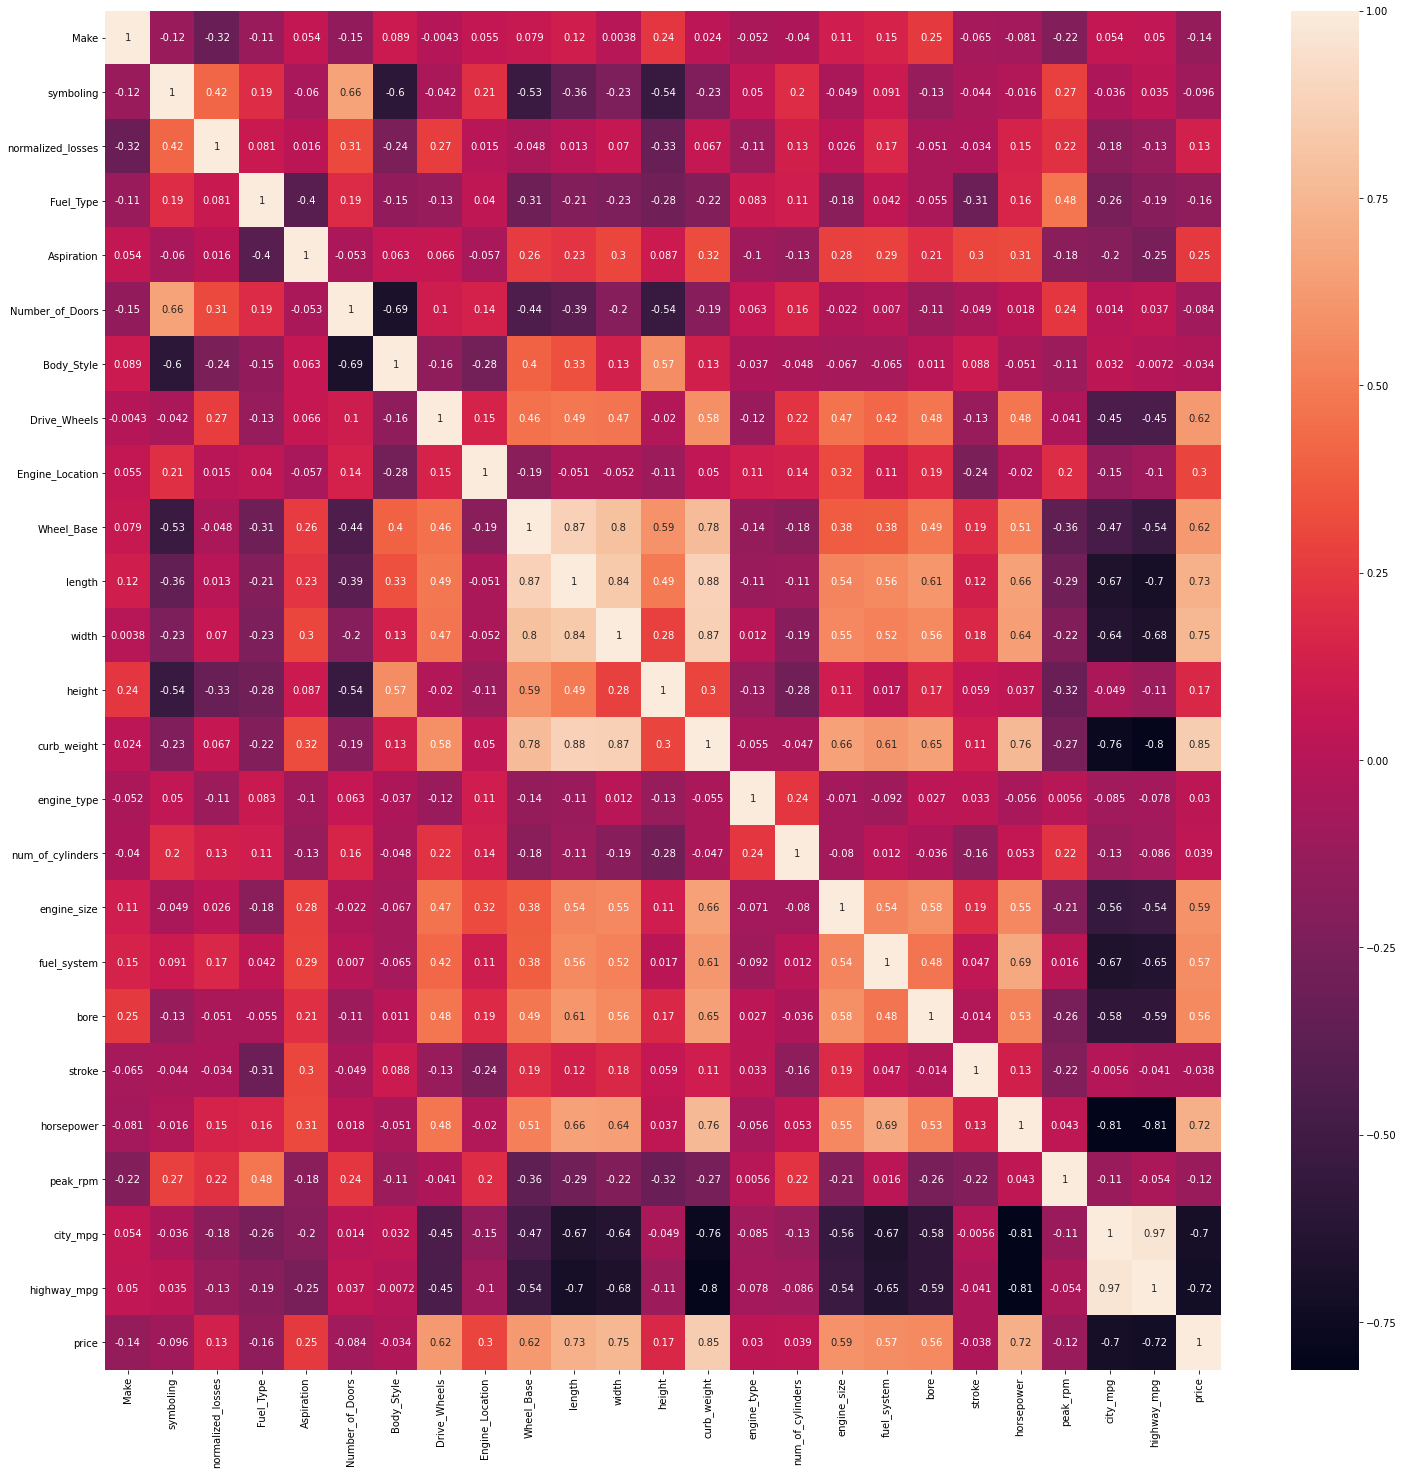

In [164]:
plt.figure(figsize=(25,25))
sns.heatmap(Car_Price.corr(), annot=True)

###### Correlation of Features which are in the range 0.4 to  - 0.4 are considered as weak correlation or no correlation, features which has 0.5 to 1.0 or  -0.5 to -1.0 are considered as high  positive or negatice correlation respectively.

========================================================================================================================